## 0. ИМПОРТ НЕОБХОДИМЫХ ФАЙЛОВ

In [1]:
import os
import sys
import warnings
import re

from datetime import timedelta

import tqdm

import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## 1. ДАННЫЕ ДОМ РФ

### 1.1. ПЕРВИЧНЫЙ ПРОСМОТР

#### 1.1.1 ПЕРЕСОХРАНЕНИЕ В ФОРМАТЕ .csv

In [2]:
# Первичная выгрузка данных по декларациям и сохранение в .csv (MCК)
declaration_msk = pd.read_excel('declaration_dynamics_02102024.xlsx', sheet_name = 'Данные')
declaration_msk.to_csv('declaration_dynamics_02102024.csv', index=False)

In [3]:
# Выгрузка .csv (МСК)
declaration_msk = pd.read_csv('declaration_dynamics_02102024.csv')

<ipython-input-3-fd5556e870d9>:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  declaration_msk = pd.read_csv('declaration_dynamics_02102024.csv')


In [4]:
display(declaration_msk.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202772 entries, 0 to 202771
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Дата выгрузки                 72898 non-null   object 
 1   ID ЖК                         72898 non-null   object 
 2   ЖК                            72898 non-null   object 
 3   Корпуса                       72898 non-null   object 
 4   Регион Город                  72898 non-null   object 
 5   Округ Направление             72898 non-null   object 
 6   Регион                        72898 non-null   object 
 7   Застройщик                    72898 non-null   object 
 8   Дата начала интервала         72898 non-null   object 
 9   Дата завершения интервала     72898 non-null   object 
 10  Длина интервала, мес.         72898 non-null   object 
 11  Интервал                      72898 non-null   object 
 12  Продано квартир (ед.)         72898 non-null

None

In [5]:
declaration_msk.describe()

,Продано квартир (ед.),Продано нежилых (ед.),Продано машиномест (ед.),Продано квартир (кв. м.),Продано нежилых (кв. м.),Продано машиномест (кв. м.),Продано квартир (руб.),Продано нежилых (руб.),Продано машиномест (руб.),Цена кв. м квартир (руб.),Цена кв. м нежилых (руб.),Цена кв. м машиномест (руб.)
count,72898.000000,72898.000000,72898.000000,72898.000000,72898.000000,72898.000000,7.289800e+04,7.289800e+04,7.289800e+04,7.289800e+04,7.289800e+04,7.289800e+04
mean,12.253340,2.233340,1.501276,660.916994,69.510124,25.035529,1.300772e+08,1.534759e+07,3.088371e+06,1.330158e+05,4.896443e+04,2.073767e+04
std,52.156714,24.085255,10.692234,2841.374521,724.839869,245.516004,1.238192e+09,5.910614e+08,4.433444e+07,1.698146e+05,1.195159e+05,1.083532e+05
min,-5048.000000,-154.000000,-222.000000,-56965.000000,-43279.000000,-14592.000000,-2.137145e+11,-1.080409e+11,-4.329964e+09,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000,0.000000,0.000000,91.000000,0.000000,0.000000,1.644266e+07,0.000000e+00,0.000000e+00,1.052750e+05,0.000000e+00,0.000000e+00
75%,11.000000,1.000000,0.000000,579.000000,5.000000,0.000000,1.232684e+08,4.741425e+05,0.000000e+00,2.089320e+05,5.001400e+04,0.000000e+00
max,4820.000000,5514.000000,643.000000,114862.000000,65379.000000,16701.000000,2.139734e+11,1.080409e+11,4.116435e+09,1.999501e+06,1.999944e+06,2.048597e+07


#### 1.1.2 ПРЕДОБРАБОТКА

In [6]:
# Просмотр столбцов таблицы для выбора интересующих
declaration_msk.columns

Index(['Дата выгрузки', 'ID ЖК', 'ЖК', 'Корпуса', 'Регион Город',
       'Округ Направление', 'Регион', 'Застройщик', 'Дата начала интервала',
       'Дата завершения интервала', 'Длина интервала, мес.', 'Интервал',
       'Продано квартир (ед.)', 'Продано нежилых (ед.)',
       'Продано машиномест (ед.)', 'Продано квартир (кв. м.)',
       'Продано нежилых (кв. м.)', 'Продано машиномест (кв. м.)',
       'Продано квартир (руб.)', 'Продано нежилых (руб.)',
       'Продано машиномест (руб.)', 'Цена кв. м квартир (руб.)',
       'Цена кв. м нежилых (руб.)', 'Цена кв. м машиномест (руб.)',
       'фильтр по числу квартир'],
      dtype='object')

In [7]:
test_declarations = declaration_msk.copy()

# Отбор необходимых столбцов
test_declarations = test_declarations[[
                                        'ЖК',
                                        'ID ЖК',
                                        'Корпуса',
                                        'Регион',
                                        'Застройщик',
                                        'Округ Направление',
                                        'Дата начала интервала',
                                        'Дата завершения интервала',
                                        'Продано квартир (кв. м.)',
                                        'Продано нежилых (кв. м.)',
                                        'Продано квартир (руб.)',
                                        'Продано нежилых (руб.)',
                                        'Цена кв. м квартир (руб.)'
                                        ]]

# Приведение столбца в формат дат
test_declarations['Дата завершения интервала'] = pd.to_datetime(test_declarations['Дата завершения интервала'])
test_declarations['Дата начала интервала'] = pd.to_datetime(test_declarations['Дата начала интервала'])

# Отбираем данные на конкретные даты
test_declarations = test_declarations[test_declarations['Дата завершения интервала'] > '2018-12-31']

In [8]:
test_declarations.head(10)

,ЖК,ID ЖК,Корпуса,Регион,Застройщик,Округ Направление,Дата начала интервала,Дата завершения интервала,Продано квартир (кв. м.),Продано нежилых (кв. м.),Продано квартир (руб.),Продано нежилых (руб.),Цена кв. м квартир (руб.)
0,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2019-07-31,2019-12-09,39.0,0.0,2420400.0,0.0,62062.0
1,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2019-12-09,2020-01-10,536.0,0.0,44480428.0,0.0,82986.0
2,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-01-10,2020-02-10,887.0,0.0,70075023.0,0.0,79002.0
3,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-02-10,2020-03-10,1233.0,0.0,98205167.0,0.0,79647.0
4,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-03-10,2020-04-09,1291.0,0.0,101148479.0,0.0,78349.0
5,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-04-09,2020-05-14,1602.0,0.0,128020072.0,0.0,79913.0
6,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-05-14,2020-06-10,671.0,0.0,56709452.0,0.0,84515.0
7,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-06-10,2020-07-10,1532.0,0.0,118095412.0,0.0,77086.0
8,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-07-10,2020-08-10,1752.0,38.0,143378219.0,1555200.0,81837.0
9,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-08-10,2020-09-09,3545.0,20.0,294598417.0,790400.0,83103.0


In [9]:
# Группировка и сортировка данных
msk_grouped1 = test_declarations[test_declarations['Регион'] == 'Москва'].sort_values(by='Продано квартир (кв. м.)')
new_msk_grouped1 = test_declarations[test_declarations['Регион'] == 'Новая Москва'].sort_values(by='Продано квартир (кв. м.)')
mo_grouped1 = test_declarations[test_declarations['Регион'] == 'Московская область'].sort_values(by='Продано квартир (кв. м.)')

#### 1.1.3 ПОСТРОЕНИЕ ГРАФИКОВ

In [10]:
# Построение боксплотов
def plot_boxplot(data, title, x_label, y_label, order=None):
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Округ Направление', y='Продано квартир (кв. м.)', data=data, palette='Blues', showfliers=False, order=order)
    plt.title(title, fontsize=20, pad=20)
    plt.xlabel(x_label, fontsize=14, labelpad=15)
    plt.ylabel(y_label, fontsize=16, labelpad=15)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.2)
    plt.tight_layout()
    plt.show()

<ipython-input-10-dd7de41974af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Округ Направление', y='Продано квартир (кв. м.)', data=data, palette='Blues', showfliers=False, order=order)


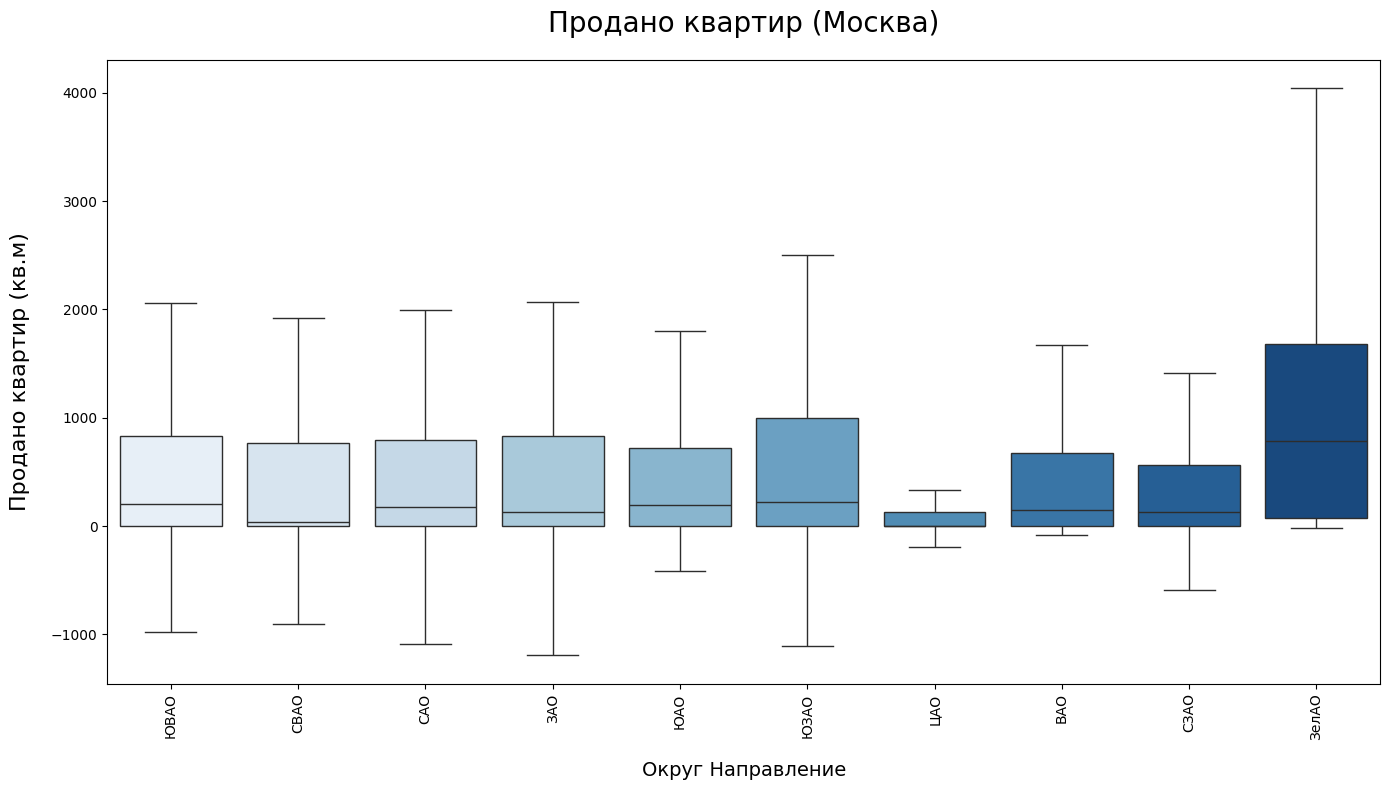

<ipython-input-10-dd7de41974af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Округ Направление', y='Продано квартир (кв. м.)', data=data, palette='Blues', showfliers=False, order=order)


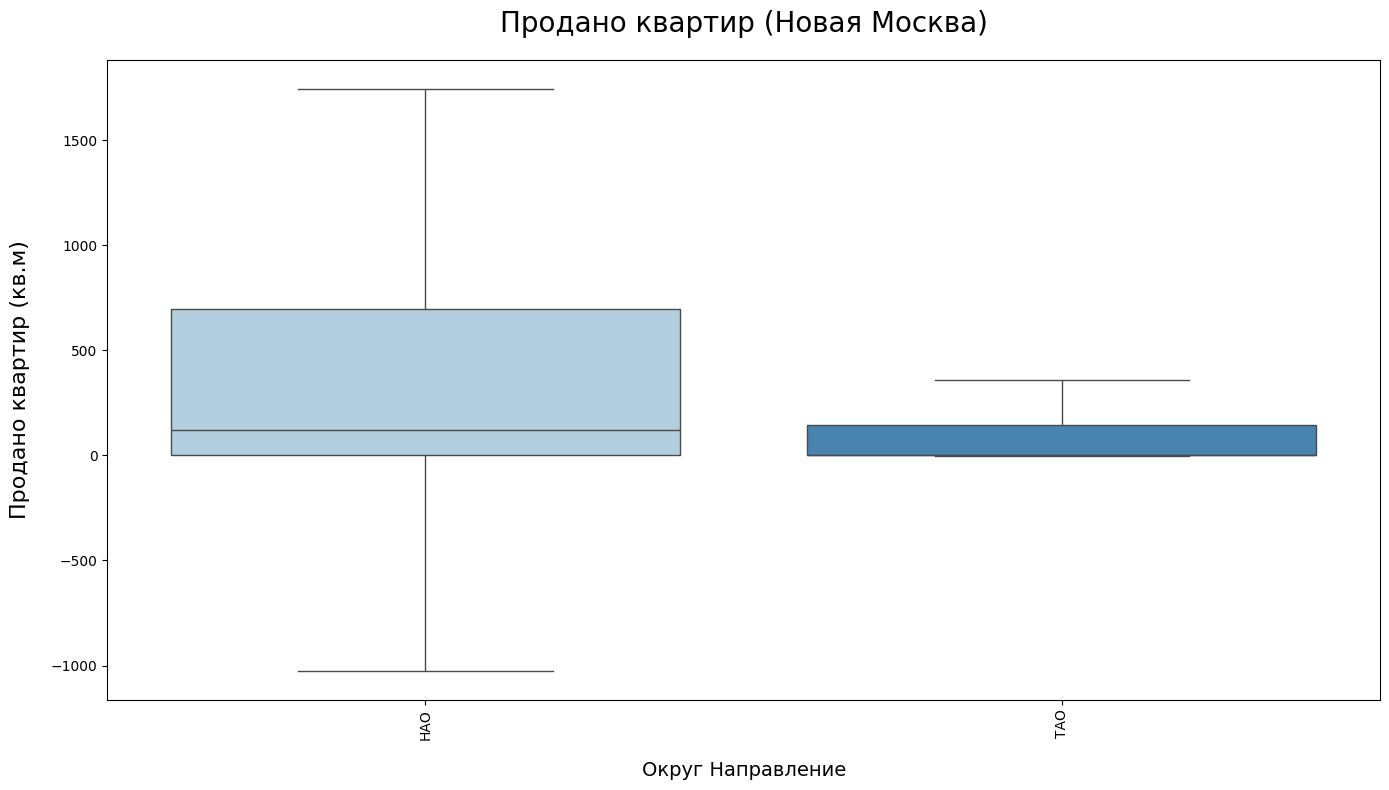

<ipython-input-10-dd7de41974af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Округ Направление', y='Продано квартир (кв. м.)', data=data, palette='Blues', showfliers=False, order=order)


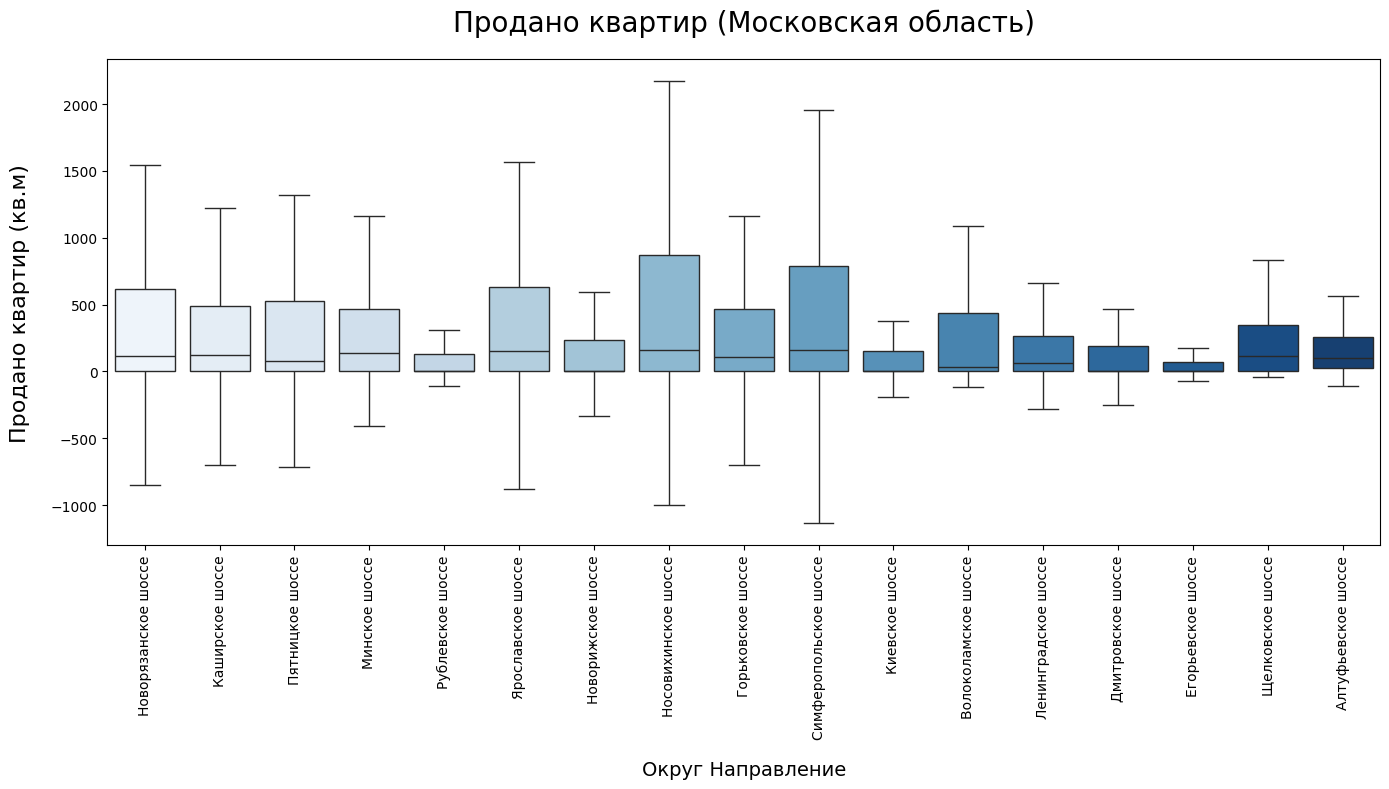

In [11]:
# Вывод графиков для разных регионов
plot_boxplot(msk_grouped1, 'Продано квартир (Москва)', 'Округ Направление', 'Продано квартир (кв.м)')
plot_boxplot(new_msk_grouped1, 'Продано квартир (Новая Москва)', 'Округ Направление', 'Продано квартир (кв.м)')
plot_boxplot(mo_grouped1, 'Продано квартир (Московская область)','Округ Направление', 'Продано квартир (кв.м)')

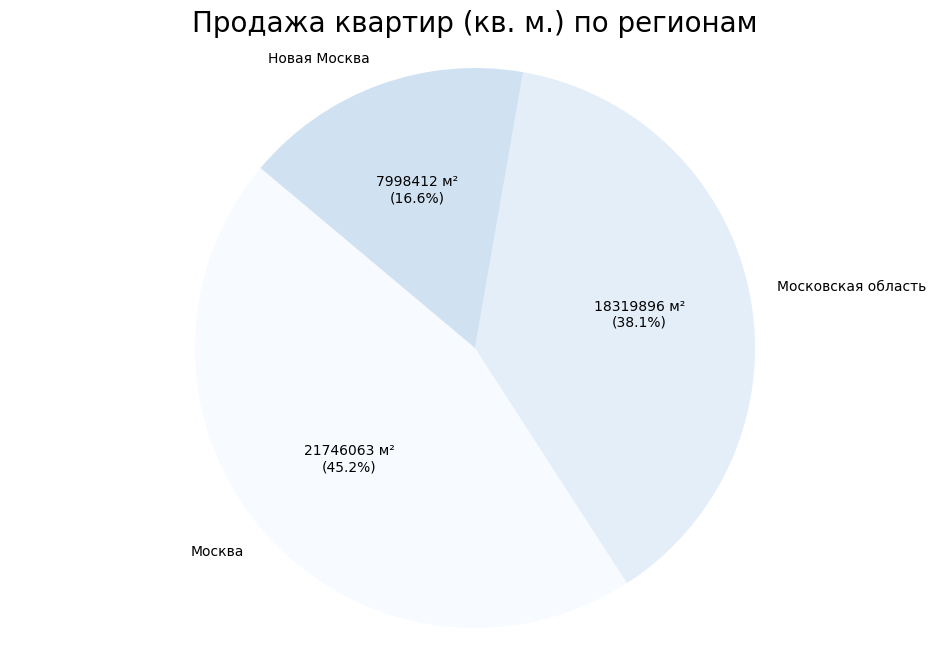

In [12]:
# Группировка данных по регионам и суммирование проданных квадратных метров
sales_by_region = test_declarations.groupby('Регион')['Продано квартир (кв. м.)'].sum()

# Настройка цветов для пайчарта
colors = plt.cm.Blues(range(0, 256, 25)) # Используем цветовую карту Blues

# Функция для отображения процентов и значений
def func(percentage, allvalues):
    absolute = int(percentage / 100. * sum(allvalues)) # Вычисляем абсолютное значение
    return f'{absolute} м²\n({percentage:.1f}%)'

# Создание пайчарта
plt.figure(figsize=(12, 8)) # Увеличьте размер графика
plt.pie(sales_by_region, labels=sales_by_region.index, colors=colors,
autopct=lambda pct: func(pct, sales_by_region), startangle=140)
plt.title('Продажа квартир (кв. м.) по регионам', fontsize =20)
plt.axis('equal') # Для равных осей (круглая форма)

# Сохранение графика в высоком качестве
plt.savefig('sales_by_region_pie_chart.png', dpi=300, bbox_inches='tight') # Сохранение в PNG с разрешением 300 DPI

# Отображение графика
plt.show()

### 1.2. БОЛЕЕ ДЕТАЛЬНЫЙ АНАЛИЗ

#### 1.2.1 ПРЕДОБРАБОТКА

In [13]:
# Группировка данных по застройщикам и суммирование проданных квадратных метров
top_developers = test_declarations.groupby('Застройщик')['Продано квартир (кв. м.)'].sum().nlargest(10)
top_projects = test_declarations.groupby('ЖК')['Продано квартир (кв. м.)'].sum().nlargest(10)

#### 1.2.2 ПОСТРОЕНИЕ ГРАФИКОВ 1

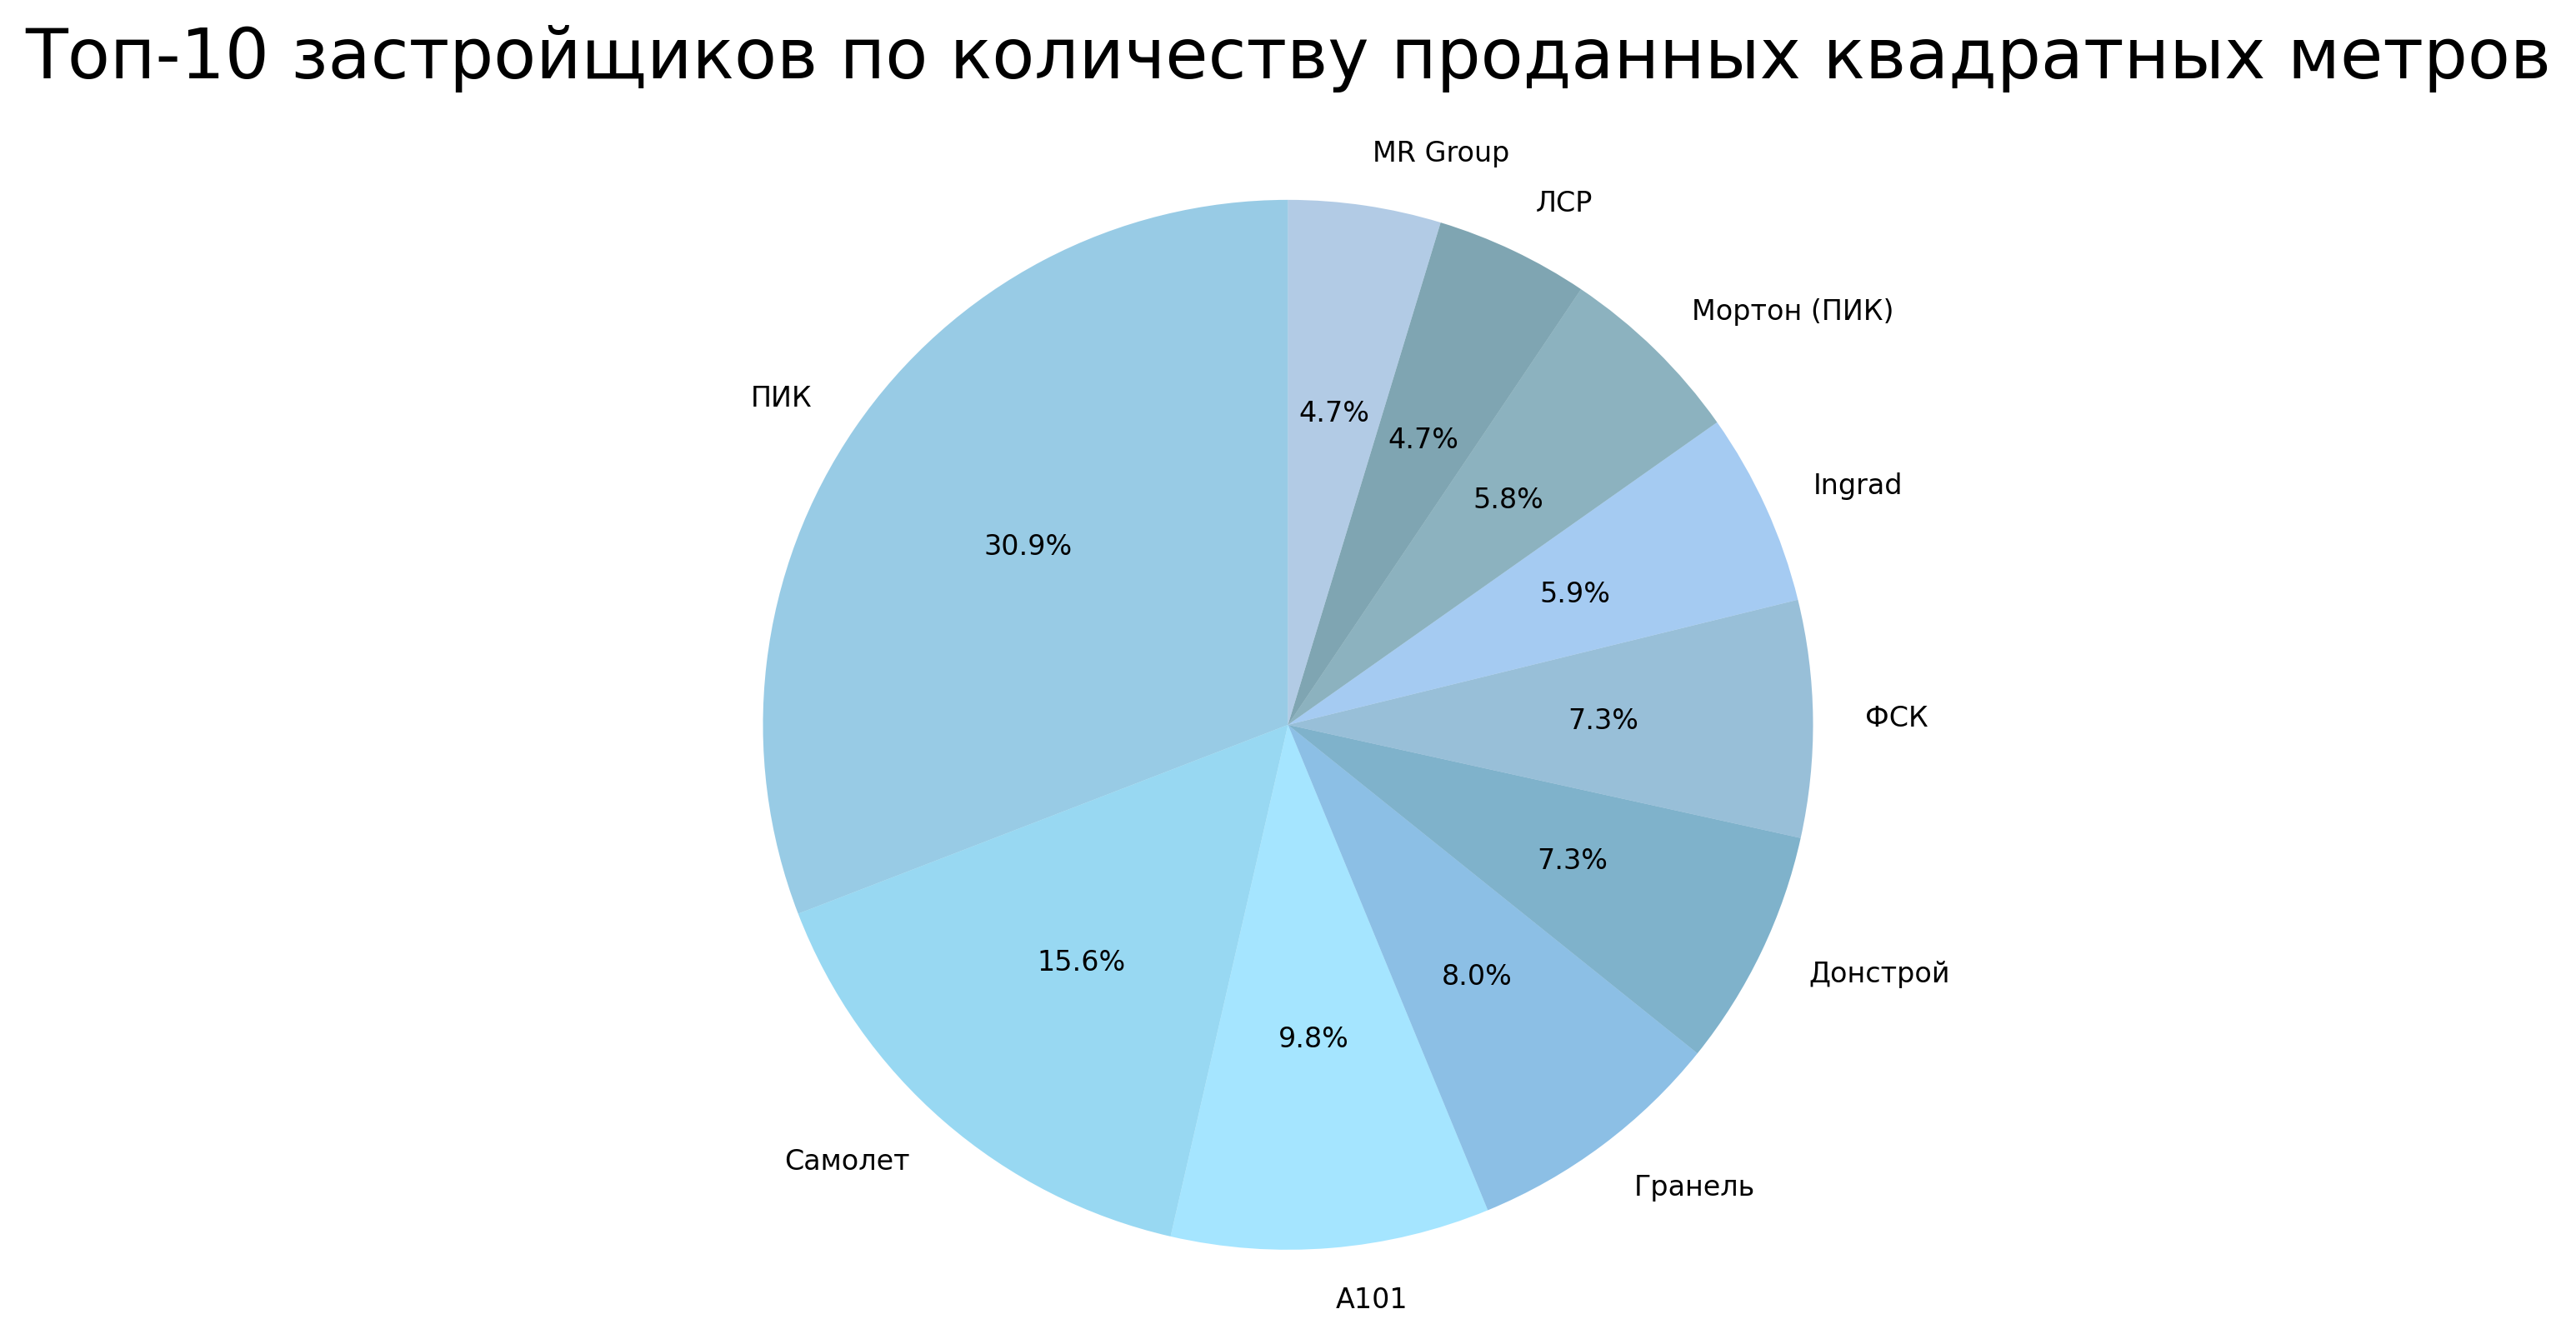

In [14]:
# Цвета в формате RGBA
colors = [
        (0.2, 0.6, 0.8, 0.5), # Прозрачный голубой
        (0.2, 0.7, 0.9, 0.5), # Более светлый прозрачный голубой
        (0.3, 0.8, 1.0, 0.5), # Светло-голубой
        (0.1, 0.5, 0.8, 0.5), # Темный прозрачный голубой
        (0.0, 0.4, 0.6, 0.5), # Умеренно прозрачный голубой
        (0.2, 0.5, 0.7, 0.5), # Умеренно темный прозрачный голубой
        (0.3, 0.6, 0.9, 0.5), # Яркий прозрачный голубой
        (0.1, 0.4, 0.5, 0.5), # Сероватый прозрачный голубой
        (0.0, 0.3, 0.4, 0.5), # Очень светлый прозрачный голубой
        (0.4, 0.6, 0.8, 0.5) # Темный прозрачный голубой
        ]

# Создание пайчарта
plt.figure(figsize=(10, 6), dpi=300) # Увеличение разрешения до 300 точек на дюйм
plt.pie(
        top_developers,
        labels=top_developers.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(top_developers)],
        textprops={'size': 8} # Уменьшаем размер цифр
        )
plt.title('Топ-10 застройщиков по количеству проданных квадратных метров', pad=20, fontsize=20) # Настройка заголовка
plt.axis('equal') # Чтобы круг был действительно кругом

# Сохранение графика в высоком качестве
plt.savefig('top1_developers_pie_chart.png', dpi=300, bbox_inches='tight') # Сохранение графика
plt.show()

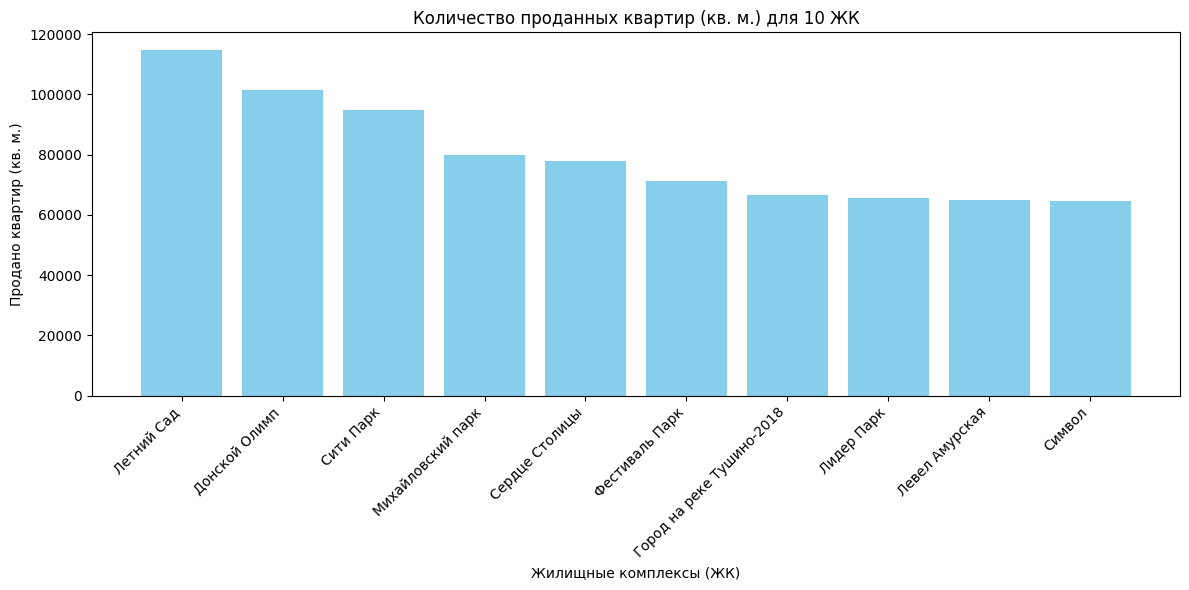

In [15]:
# Выбираем 10 ЖК с наибольшим количеством проданных квартир (кв. м.)
top_10_jk = test_declarations.nlargest(10, 'Продано квартир (кв. м.)')

# Строим график
plt.figure(figsize=(12, 6))
plt.bar(top_10_jk['ЖК'], top_10_jk['Продано квартир (кв. м.)'], color='skyblue')
plt.title('Количество проданных квартир (кв. м.) для 10 ЖК')
plt.xlabel('Жилищные комплексы (ЖК)')
plt.ylabel('Продано квартир (кв. м.)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 1.2.3 ПОСТРОЕНИЕ ИНТЕРПОЛЯЦИИ

In [16]:
# Группируем по ЖК и рассчитываем сумму, а также количество уникальных корпусов
summary = test_declarations.groupby('ЖК').agg({
                                            'Продано квартир (кв. м.)': 'sum',
                                            'Корпуса': 'nunique' # Количество уникальных корпусов
                                            }).reset_index()

In [17]:
def interpolate_sales_by_month(test_declarations):
    results = []

    # Преобразуем столбцы с датами в формат datetime
    test_declarations['Дата начала интервала'] = pd.to_datetime(test_declarations['Дата начала интервала'])
    test_declarations['Дата завершения интервала'] = pd.to_datetime(test_declarations['Дата завершения интервала'])

    # Проходим по каждому ЖК
    for _, row in test_declarations.iterrows():
        start_date = row['Дата начала интервала']
        end_date = row['Дата завершения интервала']
        total_sales = row['Продано квартир (кв. м.)']
        name = row['ЖК']
        region = row['Регион']
        okrug = row['Округ Направление']
        developer = row['Застройщик']
        corpus = row['Корпуса']
        ID = row['ID ЖК']
        price = row['Цена кв. м квартир (руб.)']

        # Рассчитываем продажи за день
        total_days = (end_date - start_date).days + 1
        sales_per_day = total_sales / total_days if total_days > 0 else 0

        # Создаем список месяцев в интервале
        months = pd.date_range(start_date, end_date, freq='MS')

        # Если интервал в пределах одного месяца или меньше
        if len(months) == 0 or (start_date.year == end_date.year and start_date.month == end_date.month):
            results.append({
                'project': name,
                'year': start_date.year,
                'months': start_date.month,
                'sales_live': total_sales,
                'developer': developer,
                'region': region,
                'okrug': okrug,
                'corpus': corpus,
                'ID': ID,
                'price':price
            })
            continue

        # Обрабатываем каждый месяц
        for i, month_start in enumerate(months):
            # Определяем начало и конец периода для текущего месяца
            if i == 0:  # Первый месяц
                period_start = start_date
            else:
                period_start = month_start

            if i == len(months) - 1:  # Последний месяц
                period_end = end_date
            else:
                period_end = month_start + pd.offsets.MonthEnd(0)

            # Считаем дни и продажи за месяц
            days_in_period = (period_end - period_start).days + 1
            month_sales = sales_per_day * days_in_period

            results.append({
                'project': name,
                'year': period_start.year,
                'months': period_start.month,
                'sales_live': month_sales,
                'developer': developer,
                'region': region,
                'okrug': okrug,
                'corpus': corpus,
                'ID': ID,
                'price':price
            })

        # Обработка последнего месяца, если он не был включен в цикл
        if end_date > (months[-1] + pd.offsets.MonthEnd(0)):
            period_start = months[-1] + pd.offsets.MonthEnd(0) + pd.Timedelta(days=1)
            period_end = end_date
            days_in_period = (period_end - period_start).days + 1
            month_sales = sales_per_day * days_in_period

            results.append({
                'project': name,
                'year': period_start.year,
                'months': period_start.month,
                'sales_live': month_sales,
                'developer': developer,
                'region': region,
                'okrug': okrug,
                'corpus': corpus,
                'ID': ID,
                'price':price
            })

    # Создаем и группируем результирующий датафрейм
    result_df = pd.DataFrame(results)
    result_df = result_df.groupby(['project', 'year', 'months', 'developer', 'region', 'okrug', 'corpus', 'ID', 'price'])['sales_live'].sum().reset_index()

    # Сортируем результаты
    result_df = result_df.sort_values(['project', 'year', 'months'])
    return result_df

In [18]:
# Устанавливаем формат вывода чисел
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Применяем функцию интерполяции и выводим результат
result = interpolate_sales_by_month(test_declarations)
print(result)

                       project  year  months     developer  \
0       31-й квартал (Пушкино)  2019       7  Профи Инвест   
1       31-й квартал (Пушкино)  2019       9  Профи Инвест   
2       31-й квартал (Пушкино)  2019      10  Профи Инвест   
3       31-й квартал (Пушкино)  2019      11  Профи Инвест   
4       31-й квартал (Пушкино)  2019      12  Профи Инвест   
...                        ...   ...     ...           ...   
113122      Яуза Парк (Мытищи)  2024       8           ПИК   
113123      Яуза Парк (Мытищи)  2024       8           ПИК   
113124      Яуза Парк (Мытищи)  2024       8           ПИК   
113125      Яуза Парк (Мытищи)  2024       8           ПИК   
113126      Яуза Парк (Мытищи)  2024       8           ПИК   

                    region              okrug  \
0       Московская область  Ярославское шоссе   
1       Московская область  Ярославское шоссе   
2       Московская область  Ярославское шоссе   
3       Московская область  Ярославское шоссе   
4       Мо

In [19]:
df_grouped = result.copy()
df_grouped.head(10)

,project,year,months,developer,region,okrug,corpus,ID,price,sales_live
0,31-й квартал (Пушкино),2019,7,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,62062.000,9.455
1,31-й квартал (Пушкино),2019,9,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,62062.000,8.864
2,31-й квартал (Пушкино),2019,10,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,62062.000,9.159
3,31-й квартал (Пушкино),2019,11,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,62062.000,8.864
4,31-й квартал (Пушкино),2019,12,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,62062.000,2.659
5,31-й квартал (Пушкино),2019,12,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,82986.000,536.000
6,31-й квартал (Пушкино),2020,1,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,79002.000,887.000
7,31-й квартал (Пушкино),2020,2,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,79647.000,1233.000
8,31-й квартал (Пушкино),2020,3,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,78349.000,1291.000
9,31-й квартал (Пушкино),2020,4,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,79913.000,1602.000


In [20]:
# Группировка обновленных данных
msk_grouped2 = df_grouped[df_grouped['region'] == 'Москва'].sort_values(by='sales_live')
new_msk_grouped2 = df_grouped[df_grouped['region'] == 'Новая Москва'].sort_values(by='sales_live')
mo_grouped2 = df_grouped[df_grouped['region'] == 'Московская область'].sort_values(by='sales_live')

#### 1.2.4 ПОСТРОЕНИЕ ГРАФИКОВ 2

In [21]:
# Построение боксплотов
def plot_boxplot2(data, title, x_label, y_label, order=None):
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='okrug', y='sales_live', data=data, palette='Blues', showfliers=False, order=order)
    plt.title(title, fontsize=20, pad=20)
    plt.xlabel(x_label, fontsize=14, labelpad=15)
    plt.ylabel(y_label, fontsize=16, labelpad=15)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.2)
    plt.tight_layout()
    plt.show()

<ipython-input-21-a2f723f875c7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='okrug', y='sales_live', data=data, palette='Blues', showfliers=False, order=order)


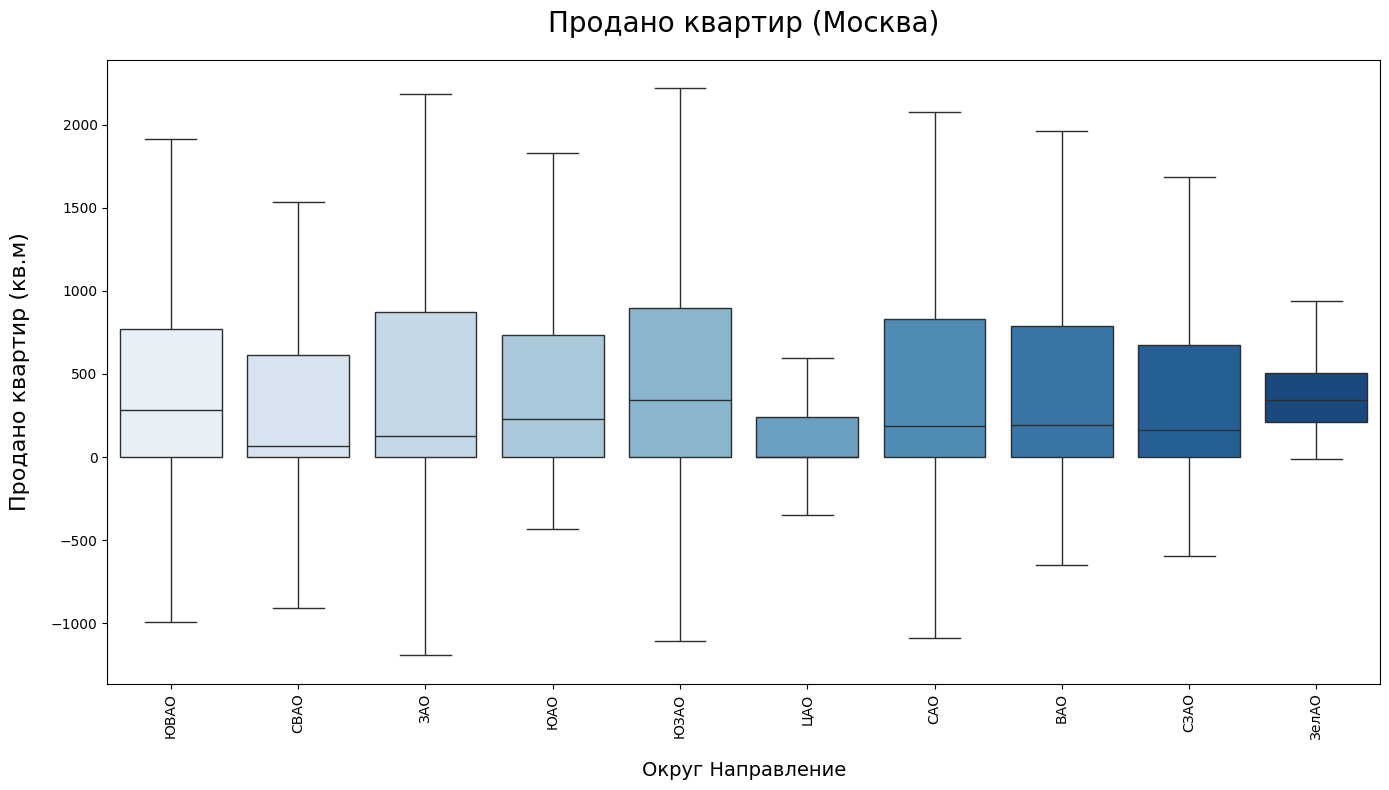

<ipython-input-21-a2f723f875c7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='okrug', y='sales_live', data=data, palette='Blues', showfliers=False, order=order)


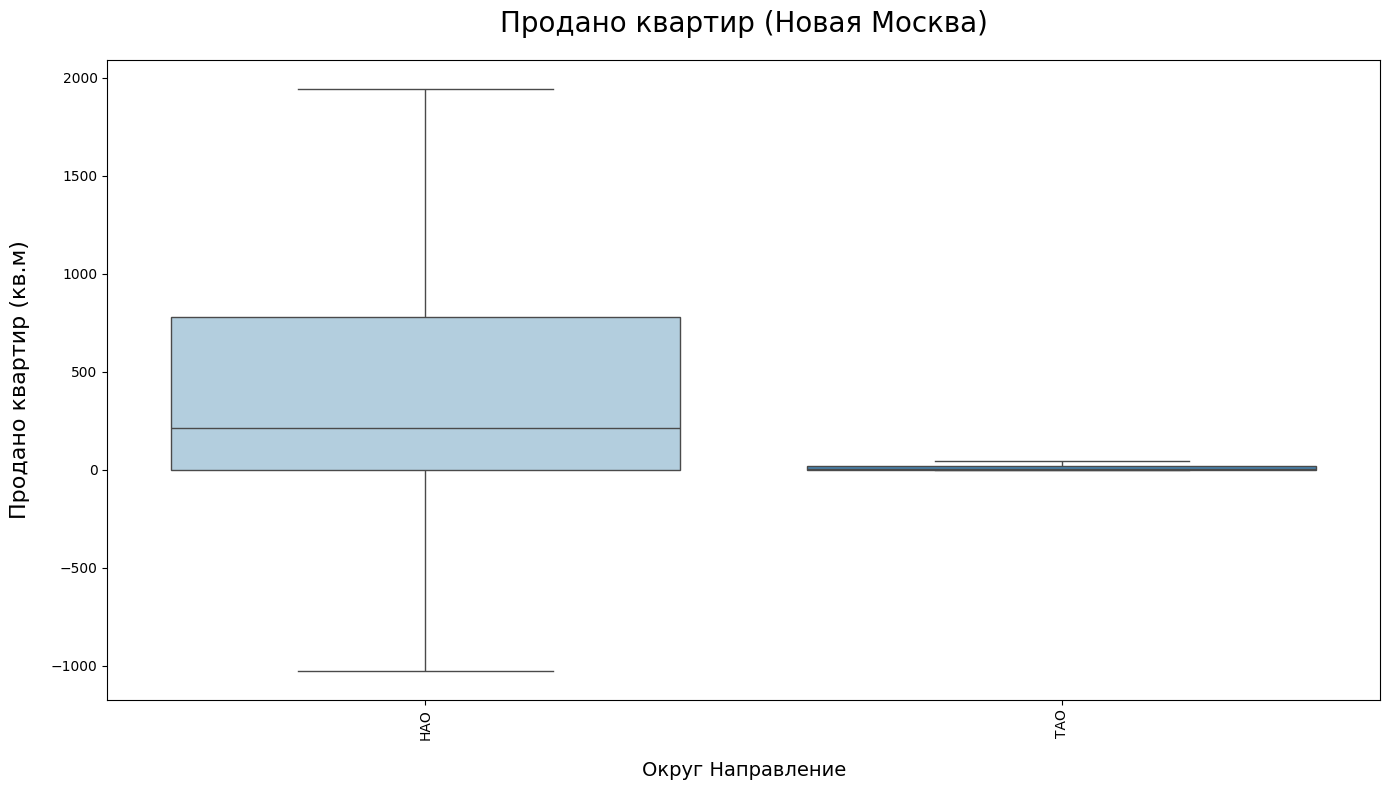

<ipython-input-21-a2f723f875c7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='okrug', y='sales_live', data=data, palette='Blues', showfliers=False, order=order)


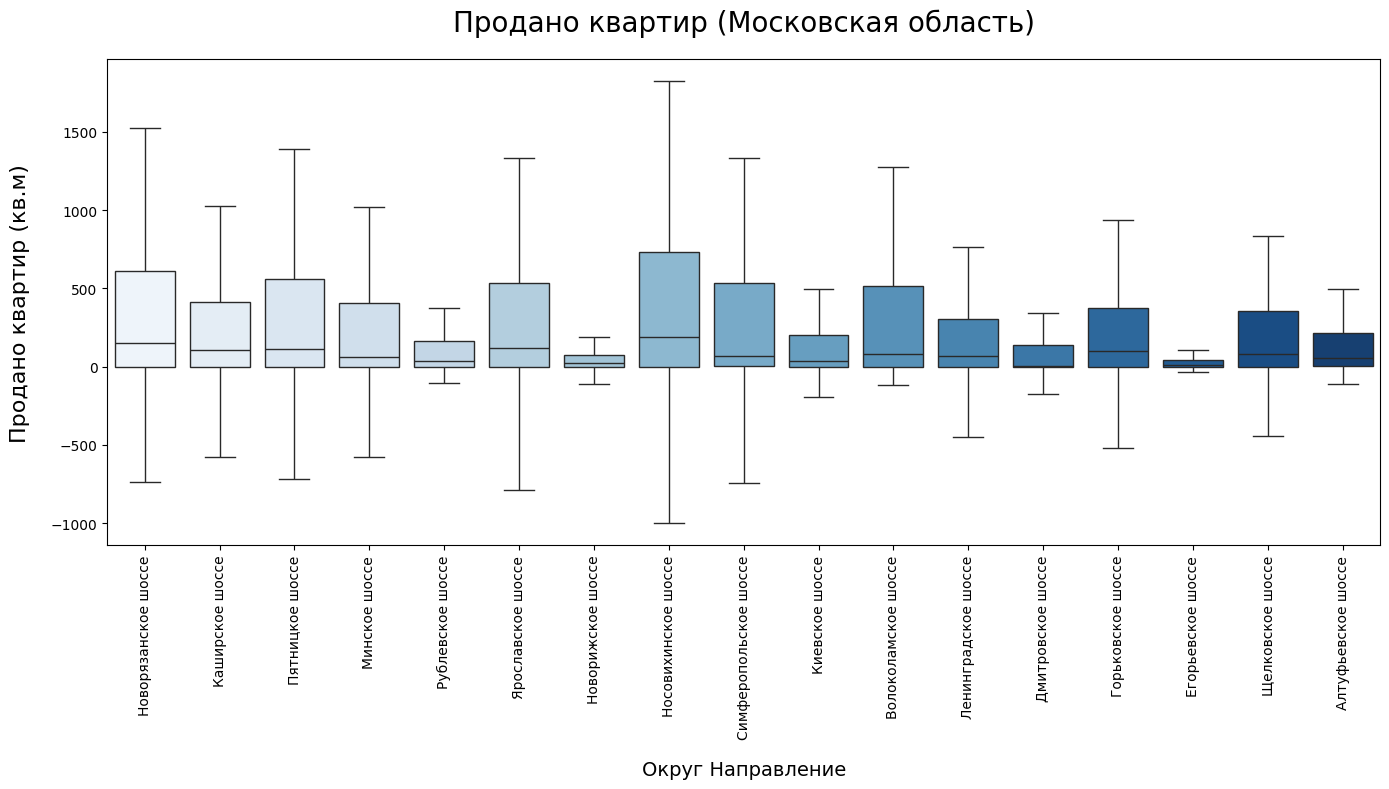

In [22]:
# Вывод графиков для разных регионов
plot_boxplot2(msk_grouped2, 'Продано квартир (Москва)', 'Округ Направление', 'Продано квартир (кв.м)')
plot_boxplot2(new_msk_grouped2, 'Продано квартир (Новая Москва)','Округ Направление', 'Продано квартир (кв.м)')
plot_boxplot2(mo_grouped2, 'Продано квартир (Московская область)', 'Округ Направление', 'Продано квартир (кв.м)')

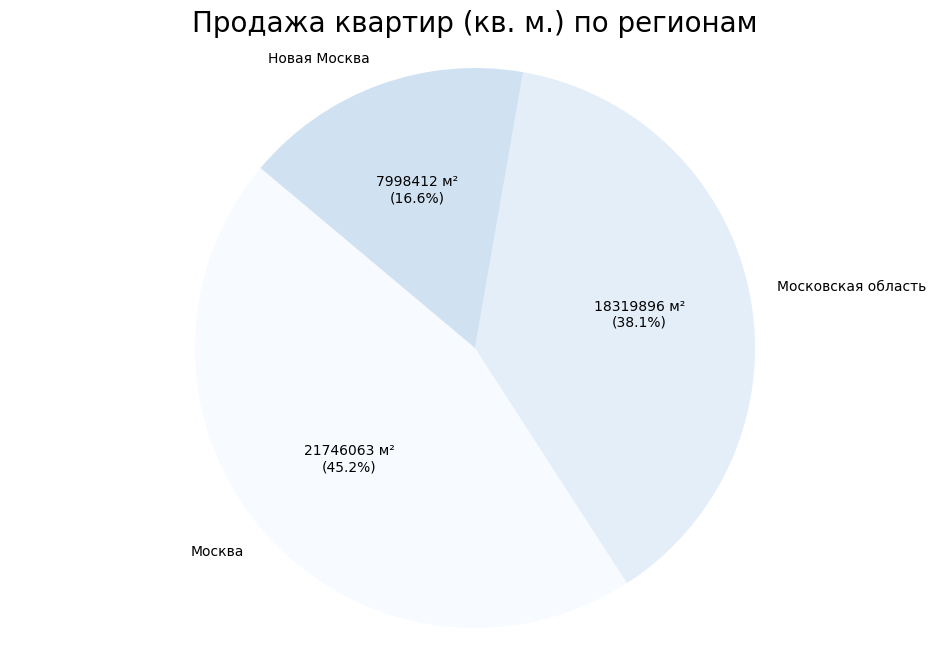

In [23]:
# Группировка данных по регионам и суммирование проданных квадратных метров
sales_by_region2 = df_grouped.groupby('region')['sales_live'].sum()

# Настройка цветов для пайчарта
colors = plt.cm.Blues(range(0, 256, 25)) # Используем цветовую карту Blues

# Функция для отображения процентов и значений
def func(percentage, allvalues):
    absolute = int(percentage / 100. * sum(allvalues)) # Вычисляем абсолютное значение
    return f'{absolute} м²\n({percentage:.1f}%)'

# Создание пайчарта
plt.figure(figsize=(12, 8)) # Увеличьте размер графика
plt.pie(sales_by_region2, labels=sales_by_region2.index, colors=colors,
autopct=lambda pct: func(pct, sales_by_region2), startangle=140)
plt.title('Продажа квартир (кв. м.) по регионам', fontsize =20)
plt.axis('equal') # Для равных осей (круглая форма)

# Сохранение графика в высоком качестве
plt.savefig('sales_by_region_pie_chart.png', dpi=300, bbox_inches='tight') # Сохранение в PNG с разрешением 300 DPI

# Отображение графика
plt.show()

#### 1.2.5 РАСЧЁТЫ

In [24]:
# Группировка данных по застройщикам и суммирование проданных квадратных метров
top_developers2 =df_grouped.groupby('developer')['sales_live'].sum().nlargest(10)
top_projects = df_grouped.groupby('project')['sales_live'].sum().nlargest(10)

#### 1.2.6 ПОСТРОЕНИЕ ГРАФИКОВ 3

(-1.099999349235515,
 1.0999999688808946,
 -1.0999999471387698,
 1.0999999974827985)

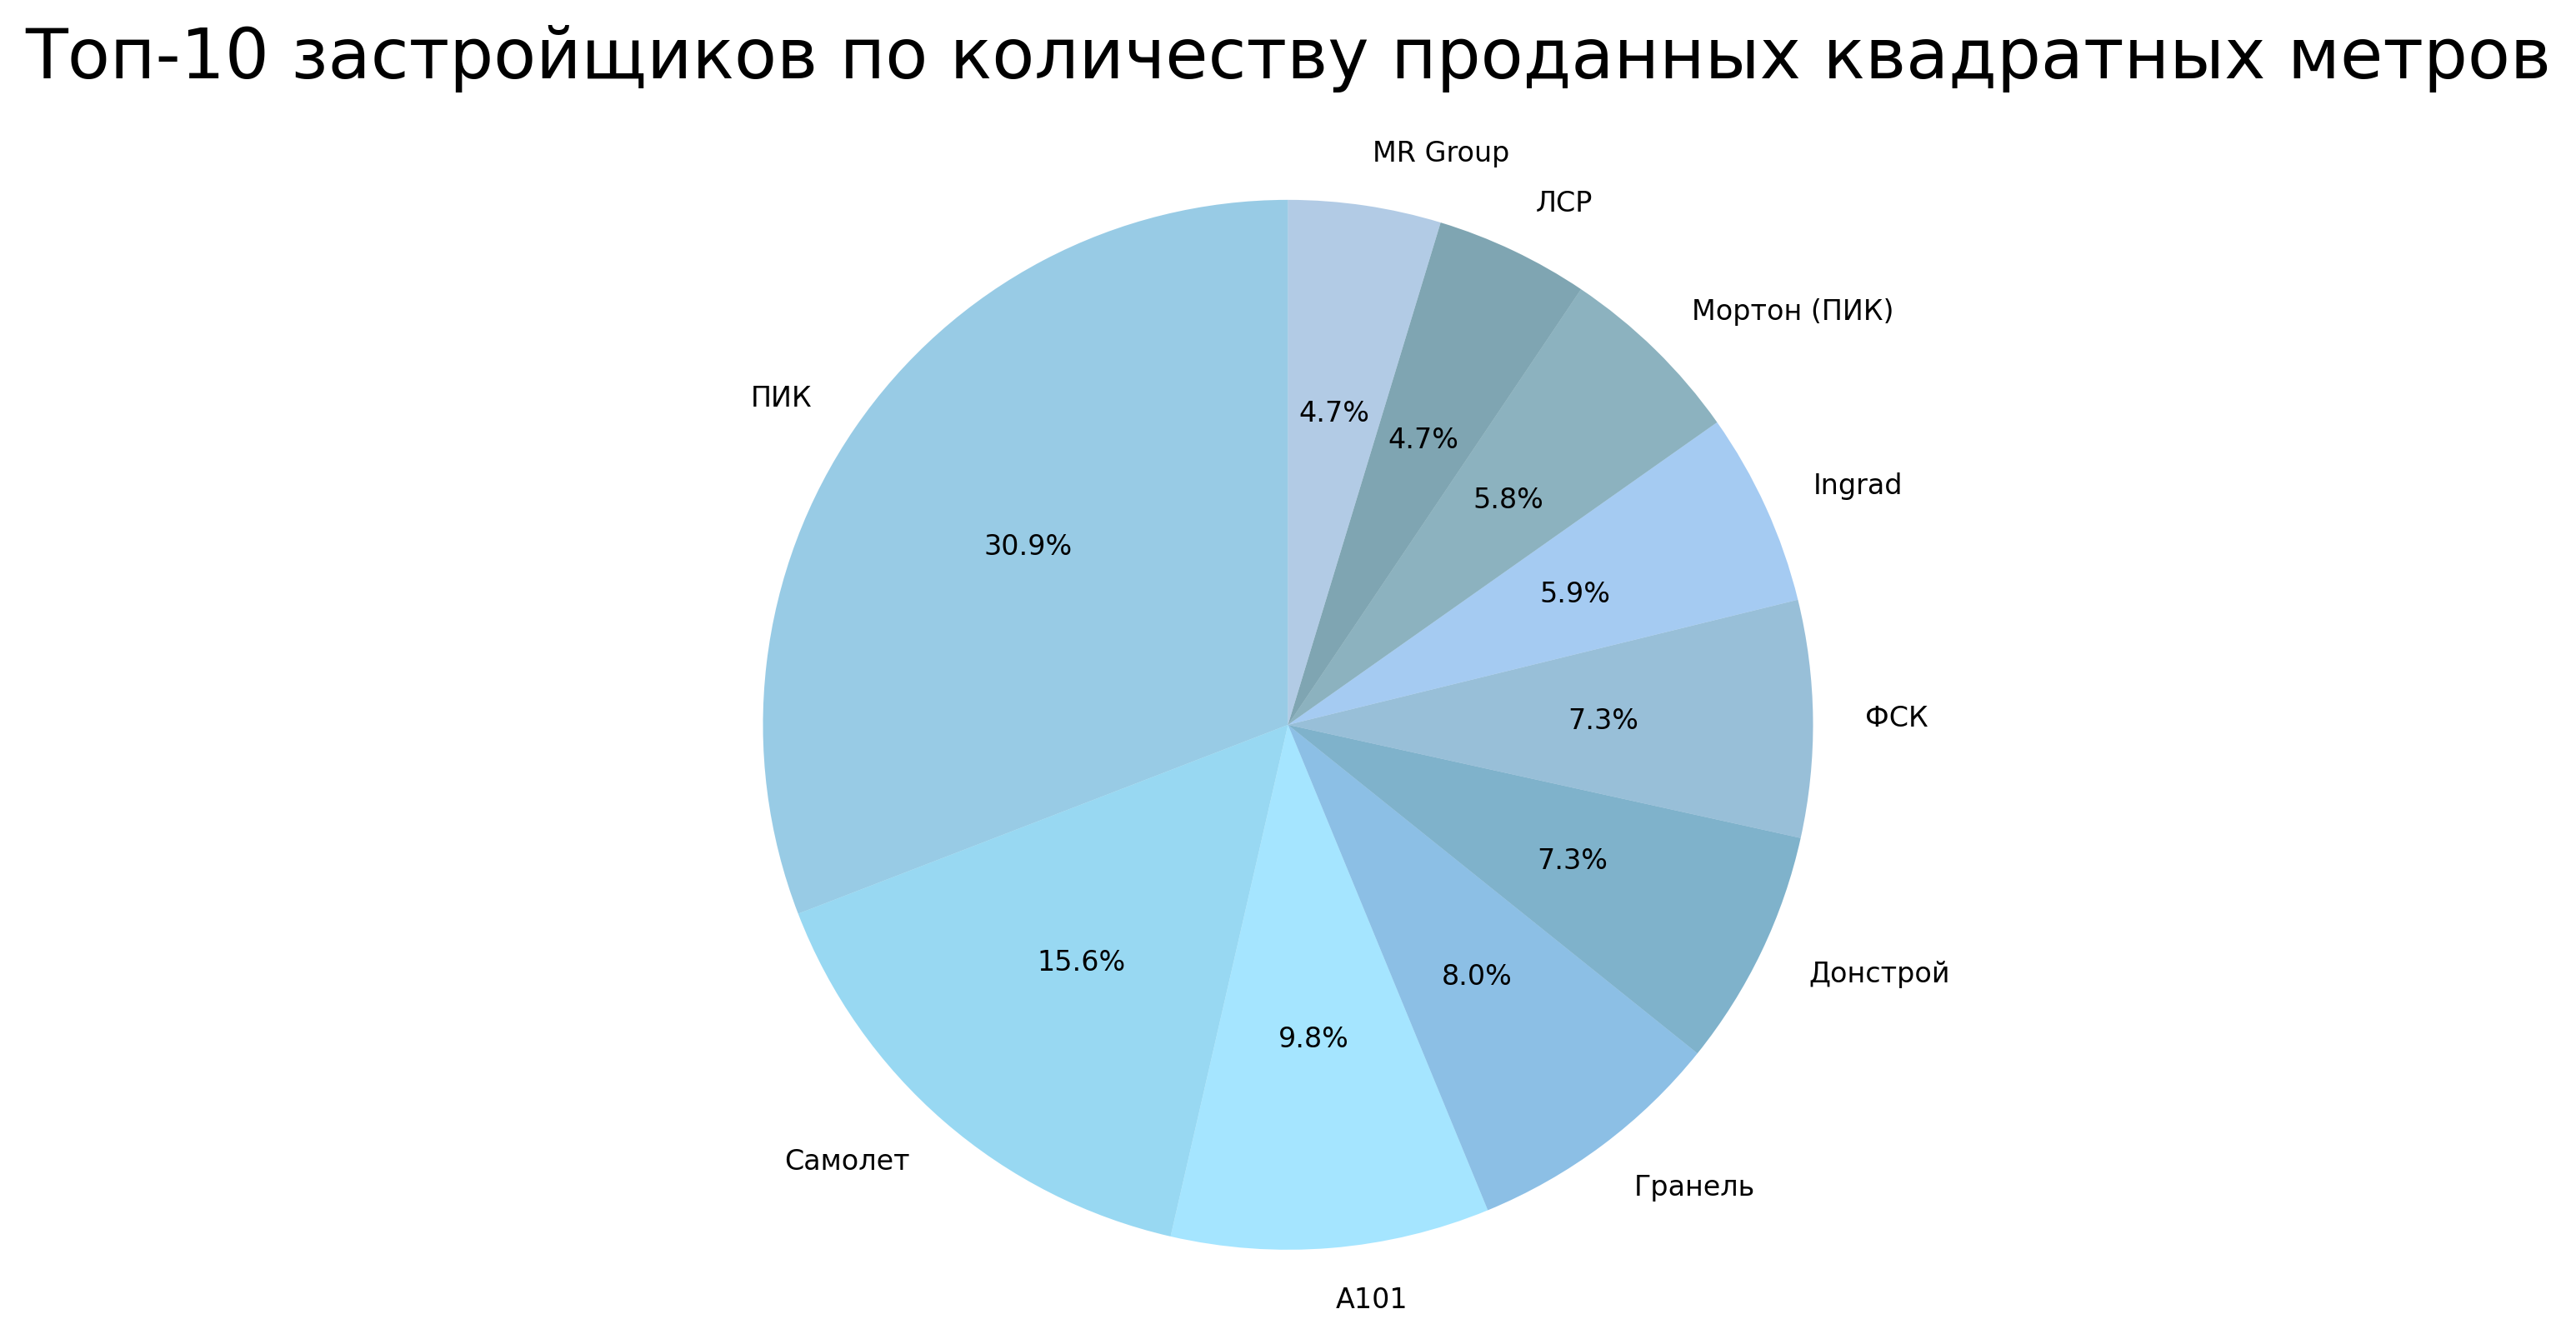

In [25]:
# Цвета в формате RGBA
colors = [
        (0.2, 0.6, 0.8, 0.5), # Прозрачный голубой
        (0.2, 0.7, 0.9, 0.5), # Более светлый прозрачный голубой
        (0.3, 0.8, 1.0, 0.5), # Светло-голубой
        (0.1, 0.5, 0.8, 0.5), # Темный прозрачный голубой
        (0.0, 0.4, 0.6, 0.5), # Умеренно прозрачный голубой
        (0.2, 0.5, 0.7, 0.5), # Умеренно темный прозрачный голубой
        (0.3, 0.6, 0.9, 0.5), # Яркий прозрачный голубой
        (0.1, 0.4, 0.5, 0.5), # Сероватый прозрачный голубой
        (0.0, 0.3, 0.4, 0.5), # Очень светлый прозрачный голубой
        (0.4, 0.6, 0.8, 0.5) # Темный прозрачный голубой
        ]

# Создание пайчарта
plt.figure(figsize=(10, 6), dpi=300) # Увеличение разрешения до 300 точек на дюйм
plt.pie(
        top_developers2,
        labels=top_developers2.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(top_developers2)],
        textprops={'size': 8} # Уменьшаем размер цифр
        )
plt.title('Топ-10 застройщиков по количеству проданных квадратных метров', pad=20, fontsize=20) # Настройка заголовка
plt.axis('equal') # Чтобы круг был действительно кругом

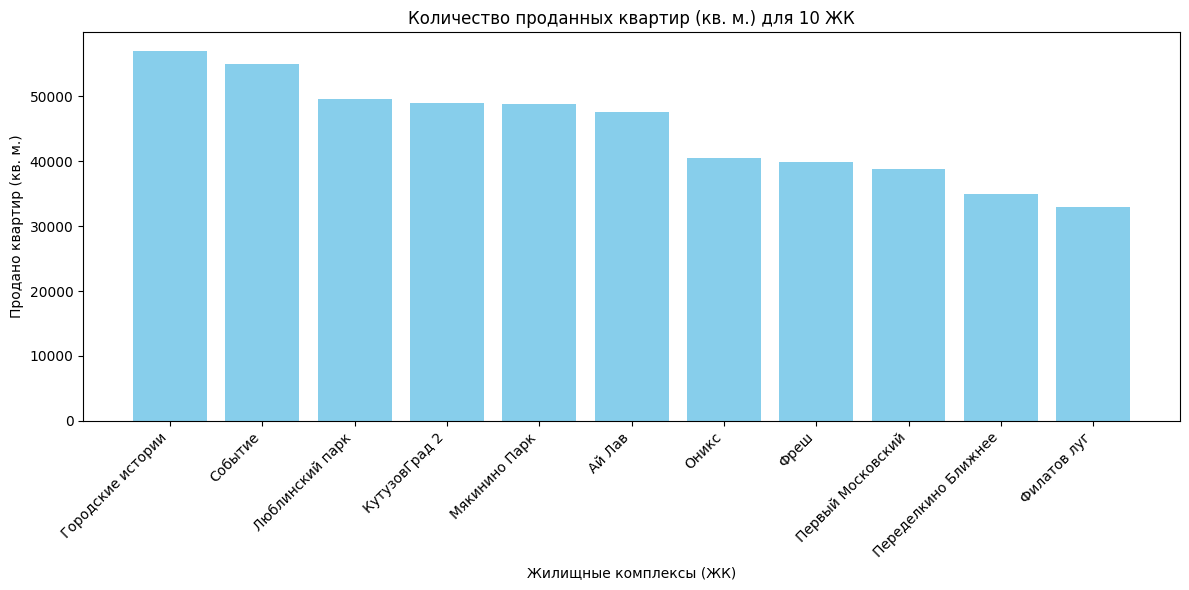

In [26]:
# Выбираем 10 ЖК с наибольшим количеством проданных квартир (кв. м.)
top_10_jk2 = df_grouped.nlargest(15, 'sales_live')

# Строим график
plt.figure(figsize=(12, 6))
plt.bar(top_10_jk2['project'], top_10_jk2['sales_live'], color='skyblue')
plt.title('Количество проданных квартир (кв. м.) для 10 ЖК')
plt.xlabel('Жилищные комплексы (ЖК)')
plt.ylabel('Продано квартир (кв. м.)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113127 entries, 0 to 113126
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   project     113127 non-null  object 
 1   year        113127 non-null  int64  
 2   months      113127 non-null  int64  
 3   developer   113127 non-null  object 
 4   region      113127 non-null  object 
 5   okrug       113127 non-null  object 
 6   corpus      113127 non-null  object 
 7   ID          113127 non-null  object 
 8   price       113127 non-null  float64
 9   sales_live  113127 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 8.6+ MB


In [28]:
# Агрегация данных в правом датафрейме (если нужно)
# df_grouped = df_grouped.groupby('ID').agg({'ID': 'first'}).reset_index()

## 2. ДАННЫЕ ЦИАН

### 2.1 ПЕРВИЧНЫЙ ПРОСМОРТ

#### 2.1.1 ПЕРЕСОХРАНЕНИЕ В ФОРМАТЕ .csv

In [29]:
new_building = pd.read_excel('new_building_02102024.xlsx')
new_building.to_csv('new_building_02102024.csv', index=False)

In [30]:
# Выгрузка .csv (МСК)
new_building = pd.read_csv('new_building_02102024.csv')

In [31]:
new_building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11957 entries, 0 to 11956
Data columns (total 74 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID К                                     11957 non-null  int64  
 1   ID ЖК                                    11957 non-null  int64  
 2   ЖК рус                                   11957 non-null  object 
 3   ЖК англ                                  3323 non-null   object 
 4   Корпус                                   11957 non-null  object 
 5   кр Корпус                                11948 non-null  object 
 6   Адрес корп                               11957 non-null  object 
 7   lat                                      11957 non-null  float64
 8   lng                                      11957 non-null  float64
 9   Район Город                              11957 non-null  object 
 10  Округ Направление                        11957

In [32]:
new_building.describe()

,ID К,ID ЖК,lat,lng,Этажность К мин,Этажность К макс,Площадь К,Квартир в К,1к кв,2к кв,...,м/м на придомовой территории (д),м/м вне придомовой территории (д),м/м в паркинге (д),пассажирских лифтов (д),грузовых лифтов (д),квартир на площадке (д),подъездов (д),корпусов в объекте,Общая площадь (д),Планируемая стоимость строительства (д)
count,11957.000,11957.000,11957.000,11957.000,11957.000,11957.000,11957.000,11957.000,11957.000,11957.000,...,3855.000,2194.000,2627.000,3557.000,2000.000,5580.000,5580.000,6499.000,3156.000,3227.000
mean,9592.931,2905.955,55.732,37.559,13.580,14.537,12090.889,225.899,109.004,78.945,...,48.669,74.464,158.814,4.407,3.474,8.069,3.210,1.918,15451.784,2579626942.923
std,5122.362,2092.315,0.212,0.361,9.448,9.766,12147.762,235.125,139.179,92.537,...,71.319,122.589,178.119,4.387,3.086,12.498,2.985,1.886,14546.666,3258897130.117
min,1411.000,529.000,54.762,30.290,0.000,0.000,0.000,0.000,0.000,0.000,...,0.300,0.200,9.500,0.300,0.100,1.000,0.200,1.000,90.000,189000.000
25%,5516.000,1253.000,55.601,37.372,5.000,5.000,3210.000,54.000,21.000,14.000,...,11.000,10.000,60.600,2.000,1.500,5.000,1.000,1.000,6610.000,587495119.500
50%,8546.000,1787.000,55.730,37.544,13.000,15.000,9042.000,165.000,65.000,52.000,...,26.000,26.000,105.300,3.000,3.000,7.000,2.000,1.000,12234.000,1615577310.000
75%,13683.000,4774.000,55.846,37.741,18.000,20.000,16535.000,315.000,146.000,114.000,...,58.100,79.750,183.000,5.000,4.000,10.000,4.000,2.000,20006.500,3235660609.000
max,19925.000,7698.000,60.059,39.542,95.000,95.000,141350.000,2677.000,2314.000,1254.000,...,860.000,1000.000,2876.000,76.000,32.000,878.000,51.000,13.000,130546.000,41899645000.000


#### 2.1.2 ПРЕДОБРАБОТКА

In [33]:
# Очистка столбца 'ID' от некорректных данных
df_grouped['ID'] = df_grouped['ID'].str.replace(r'[^\d]', '', regex=True) # Удалить все нецифровые символы
df_grouped = df_grouped[df_grouped['ID'] != ''] # Удалить пустые строки

# Приведение типа с заменой NaN на 0
df_grouped['ID'] = df_grouped['ID'].replace('', float('nan')) # Заменить пустые строки на NaN
df_grouped['ID'] = df_grouped['ID'].astype(float).fillna(0).astype(int) # Приведение типа к int

In [34]:
new_building_1 = new_building.copy()
new_building_1['ID']=new_building_1['ID ЖК']

new_building_1.info()

new_building_1 = new_building_1.groupby('ID').agg(lambda x: x.iloc[0] if isinstance(x, pd.Series) else x).reset_index()

new_building_1 = new_building_1.drop(columns=['ID К','кр Корпус','Корпус', 'Адрес корп', 'АТД', 'Округ Направление', 'Валюта цены в К', 'Очередь', 'РВЭ', 'ст', 'Продано кв и ап розн', 'Остатки кв и ап в розн',	'% остатков в лотах',	'Кв и ап. в прайсах',	'Участок',	'Продано кв и ап розн кв. м',	'Остатки кв и ап в розн кв. м',	'% остатков в кв. м',	'Продажи кв и ап розн в месяц кв. м',	'Продажи кв и ап розн в месяц',	'мес. для продажи',		'изменение ср. цены кв. м',	'номер ПД и объекта',	'м/м на придомовой территории (д)',	'м/м вне придомовой территории (д)',	'м/м в паркинге (д)'])

merged_df = pd.merge( new_building_1, df_grouped, on='ID',  how='inner')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11957 entries, 0 to 11956
Data columns (total 75 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID К                                     11957 non-null  int64  
 1   ID ЖК                                    11957 non-null  int64  
 2   ЖК рус                                   11957 non-null  object 
 3   ЖК англ                                  3323 non-null   object 
 4   Корпус                                   11957 non-null  object 
 5   кр Корпус                                11948 non-null  object 
 6   Адрес корп                               11957 non-null  object 
 7   lat                                      11957 non-null  float64
 8   lng                                      11957 non-null  float64
 9   Район Город                              11957 non-null  object 
 10  Округ Направление                        11957

In [35]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101475 entries, 0 to 101474
Data columns (total 58 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   ID                                       101475 non-null  int64  
 1   ID ЖК                                    101475 non-null  int64  
 2   ЖК рус                                   101475 non-null  object 
 3   ЖК англ                                  33881 non-null   object 
 4   lat                                      101475 non-null  float64
 5   lng                                      101475 non-null  float64
 6   Район Город                              101475 non-null  object 
 7   Регион                                   101475 non-null  object 
 8   Метро                                    97507 non-null   object 
 9   Станция жд                               37732 non-null   object 
 10  Застройщик ЖК                   

In [36]:
print("Уникальные значения в колонке 'Старт продаж К':")
print(merged_df['Старт продаж К'].unique())

Уникальные значения в колонке 'Старт продаж К':
[2013.6  2011.2  2012.1  2010.12 2011.7  2012.9  2012.5  2012.8  2012.12
 2013.4  2010.8  2012.7  2012.6  2014.2  2014.3  2013.11 2014.4  2013.7
 2013.2  2013.3  2015.4  2011.1  2014.1  2011.11 2010.3  2012.2  2012.11
 2013.12 2014.7  2013.9  2013.1  2011.3  2011.8  2010.1  2013.8  2014.5
 2015.7  2014.11 2016.1  2014.9  2016.2  2014.8  2016.3  2014.6  2015.1
 2014.12 2015.2  2015.3  2015.5  2019.11 2015.9  2015.8  2015.6  2015.11
 2015.12 2016.4  2016.5  2016.6  2018.2  2016.7  2016.8  2016.9  2016.11
 2016.12 2017.1  2017.2  2017.3  2017.4  2017.5  2017.6  2017.7  2017.8
 2017.9  2017.11 2017.12 2024.7  2018.1  2018.3  2018.4  2018.7  2018.5
 2018.6  2019.1  2018.8  2020.1  2018.9  2019.2  2018.11 2018.12 2019.3
 2019.9  2020.9  2019.12 2019.4  2020.8  2019.5      nan 2019.6  2019.7
 2022.6  2019.8  2020.4  2021.2  2023.11 2020.2  2020.11 2021.9  2020.5
 2020.3  2020.6  2021.3  2021.8  2020.7  2020.12 2022.5  2021.1  2021.4
 2021.6  202

In [37]:
# Функция для преобразования float в даты
def convert_to_date(float_date):
    try:
    # Преобразуем float в строку и разделяем на год и месяц
        year = int(str(float_date).split('.')[0])
        month = int(str(float_date).split('.')[1])
        return pd.to_datetime(f"{year}-{month}-01")

    except Exception as e:
        return pd.NaT # В случае ошибки возвращаем NaT

In [38]:
# Применяем функцию к колонке [Старт продаж К]
merged_df['Старт продаж К'] = merged_df['Старт продаж К'].apply(convert_to_date)

In [39]:
# Группировка и получение минимумов
min_dates = merged_df.groupby('ID ЖК')['Старт продаж К'].min().reset_index()

In [40]:
# Переименование колонки
min_dates.rename(columns={'Старт продаж К': 'min дата РНС'}, inplace=True)

In [41]:
# Объединение с исходным датафреймом
merged_df = merged_df.merge(min_dates, on='ID ЖК', how='left')

In [42]:
def convert_quarter_to_date(quarter_str):
    quarter, year = quarter_str.split(' кв ')
    month = (int(quarter) - 1) * 3 + 1  # Преобразование квартала в месяц
    return pd.Timestamp(year=int(year), month=month, day=1)

In [43]:
# Преобразуем колонку 'Сдача К' в стандартный формат
merged_df['Сдача К'] = merged_df['Сдача К'].apply(convert_quarter_to_date)

In [44]:
# Находим максимальную дату для каждого ID ЖК
merged_df['max дата РНВ'] = merged_df.groupby('ID ЖК')['Сдача К'].transform('max')

In [45]:
# Сортируем данные
merged_df_sorted = merged_df.sort_values(['project', 'year', 'months'])

# Рассчитываем месячный рост цен
merged_df_sorted['monthly_growth'] = merged_df_sorted.groupby('project')['sales_live'].transform(
    lambda x: (x / x.shift(1)) - 1)

# Создаем кумулятивную сумму роста для каждого project
merged_df_sorted['cumsum_growth'] = merged_df_sorted.groupby('project')['monthly_growth'].cumsum()

# Считаем количество периодов для каждого project
merged_df_sorted['periods'] = merged_df_sorted.groupby('project').cumcount()

# Рассчитываем среднее значение роста (кумулятивная сумма / количество периодов)
merged_df_sorted['average_price_growth'] = merged_df_sorted['cumsum_growth'] / merged_df_sorted['periods'].replace(0, 1)

 #Добавляем результат в исходный датафрейм
merged_df['average_price_growth'] = merged_df_sorted['average_price_growth']

In [46]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101475 entries, 0 to 101474
Data columns (total 61 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   ID                                       101475 non-null  int64         
 1   ID ЖК                                    101475 non-null  int64         
 2   ЖК рус                                   101475 non-null  object        
 3   ЖК англ                                  33881 non-null   object        
 4   lat                                      101475 non-null  float64       
 5   lng                                      101475 non-null  float64       
 6   Район Город                              101475 non-null  object        
 7   Регион                                   101475 non-null  object        
 8   Метро                                    97507 non-null   object        
 9   Станция жд                

In [47]:
df_grouped_new = df_grouped  # Исправленный вызов функции
df_grouped_new_agg = df_grouped_new.groupby(['project']).agg({'sales_live': 'sum'}).sort_values('sales_live', ascending=False).reset_index()

In [48]:
df_grouped_old = test_declarations.groupby(['ЖК']).agg({'Продано квартир (кв. м.)': 'sum'}).sort_values('Продано квартир (кв. м.)', ascending=False).reset_index()
df_grouped_old

,ЖК,Продано квартир (кв. м.)
0,Пригород Лесное,722512.000
1,Саларьево Парк,697826.000
2,Люблинский парк,604134.000
3,Символ,552815.000
4,Прокшино,486354.000
...,...,...
1013,Сокольнический вал 1,0.000
1014,Соле Хиллс,0.000
1015,Солнцево Парк,0.000
1016,Сохо Нохо,0.000


In [49]:
print(sum(df_grouped_new['sales_live']))
print(sum(df_grouped_old['Продано квартир (кв. м.)']))

48064372.00000076
48064372.0


## 3. ДАННЫЕ ЕРЗ

### 3.1 ПЕРВИЧНЫЙ ПРОСМОТР

#### 3.1.1 ПРЕДОБРАБОТКА

In [50]:
# Первичная выгрузка данных по декларациям и сохранение в .csv (MCК)
erz = pd.read_csv('zhk_save.csv')

In [51]:
erz.rename(columns={'Unnamed: 0': 'project'}, inplace=True)

In [52]:
erz.head()

,project,Уровень транспортной доступности,Перспективы изменения уровня транспортной доступности,Количество бесплатных общественных парковочных мест на 1 квартиру в шаговой доступности,Количество платных общественных парковочных мест на 1 квартиру в шаговой доступности,"Количество машиномест в доме, в отдельностоящем здании или на земельном участке на 1 квартиру",Лифт в паркинг,Зарядка для электромобилей,Светопрозрачные ворота,Широкий въезд в паркинг,...,Он-лайн регистрация права собственности на построенную квартиру,Он-лайн видео хода строительства на сайте или в мобильном приложении,Демонстрационные квартиры (шоу-румы),Комплексность строительства,Большинство помещений на первых этажах с выходом на улицу нежилые,Редевелопмент территории (масштабный снос существующих объектов),Сохранение объектов культурного наследия на территории ЖК,Статус большинства жилых единиц,"Средняя этажность в жилом комплексе, этажей",Доля озеленения в территории общего пользования
0,ЖК Дом А,средний\n4,есть перспективы улучшения\n3,"менее 0,1\n-0,8","более 0,7\n0,6","от 0,5 до 1\n1,5","есть\n0,3",нет\n0,"есть\n0,1","более 4 метров\n0,2",...,"есть\n0,1",нет\n0,"есть шоу-рум с отделкой, мебелью\n0,9","уплотнительная точечная застройка\n-2,6","да\n0,3",нет\n0,нет\n0,квартиры\n0,от 19 до 24\n-1,"более 40%\n1,2"
1,ЖК Квартал Издание,средний\n4,есть перспективы улучшения\n3,"от 0,1 до 0,2\n0","от 0,1 до 0,2\n0,05","от 0,2 до 0,5\n1","есть\n0,3","есть\n0,15","есть\n0,1","более 4 метров\n0,2",...,"есть\n0,1",нет\n0,"есть шоу-рум с отделкой, мебелью\n0,9",объем стройки до 50 тыс. м2\n0,"да\n0,3","нежилой застройки\n0,3",нет\n0,квартиры\n0,25 и более\n-2,"более 40%\n1,2"
2,ЖК Квартал МОНС,средний\n4,есть перспективы улучшения\n3,"от 0,1 до 0,2\n0","от 0,1 до 0,2\n0,05","более 1\n2,5","есть\n0,3",нет\n0,"есть\n0,1","более 4 метров\n0,2",...,"есть\n0,1",нет\n0,"есть шоу-рум с отделкой, мебелью\n0,9","объем стройки от 50 до 150 тыс. м2\n0,8","да\n0,3","нежилой застройки\n0,3",нет\n0,квартиры\n0,25 и более\n-2,"более 40%\n1,2"
3,ЖК Дом Лаврушинский,высокий\n7,нет\n0,"от 0,1 до 0,2\n0","от 0,3 до 0,7\n0,25","более 1\n2,5","есть\n0,3","есть\n0,15",нет\n0,"менее 3,5 метров\n0",...,нет\n0,"есть\n0,6",нет\n0,объем стройки до 50 тыс. м2\n0,"да\n0,3",нет\n0,нет\n0,квартиры\n0,от 5 до 8\n1,менее 25%\n0
4,ЖК Shagal,средний\n4,есть перспективы улучшения\n3,"от 0,1 до 0,2\n0",нет\n0,"от 0,5 до 1\n1,5","есть\n0,3","есть\n0,15",нет\n0,"менее 3,5 метров\n0",...,нет\n0,"есть\n0,6",нет\n0,объем стройки более 500 тыс. м2\n3,"да\n0,3","нежилой застройки\n0,3",нет\n0,квартиры\n0,от 19 до 24\n-1,"от 25 до 40%\n0,6"


In [53]:
erz['project'] = erz['project'].str.replace('ЖК ', '', regex=False)

In [54]:
erz.head()

,project,Уровень транспортной доступности,Перспективы изменения уровня транспортной доступности,Количество бесплатных общественных парковочных мест на 1 квартиру в шаговой доступности,Количество платных общественных парковочных мест на 1 квартиру в шаговой доступности,"Количество машиномест в доме, в отдельностоящем здании или на земельном участке на 1 квартиру",Лифт в паркинг,Зарядка для электромобилей,Светопрозрачные ворота,Широкий въезд в паркинг,...,Он-лайн регистрация права собственности на построенную квартиру,Он-лайн видео хода строительства на сайте или в мобильном приложении,Демонстрационные квартиры (шоу-румы),Комплексность строительства,Большинство помещений на первых этажах с выходом на улицу нежилые,Редевелопмент территории (масштабный снос существующих объектов),Сохранение объектов культурного наследия на территории ЖК,Статус большинства жилых единиц,"Средняя этажность в жилом комплексе, этажей",Доля озеленения в территории общего пользования
0,Дом А,средний\n4,есть перспективы улучшения\n3,"менее 0,1\n-0,8","более 0,7\n0,6","от 0,5 до 1\n1,5","есть\n0,3",нет\n0,"есть\n0,1","более 4 метров\n0,2",...,"есть\n0,1",нет\n0,"есть шоу-рум с отделкой, мебелью\n0,9","уплотнительная точечная застройка\n-2,6","да\n0,3",нет\n0,нет\n0,квартиры\n0,от 19 до 24\n-1,"более 40%\n1,2"
1,Квартал Издание,средний\n4,есть перспективы улучшения\n3,"от 0,1 до 0,2\n0","от 0,1 до 0,2\n0,05","от 0,2 до 0,5\n1","есть\n0,3","есть\n0,15","есть\n0,1","более 4 метров\n0,2",...,"есть\n0,1",нет\n0,"есть шоу-рум с отделкой, мебелью\n0,9",объем стройки до 50 тыс. м2\n0,"да\n0,3","нежилой застройки\n0,3",нет\n0,квартиры\n0,25 и более\n-2,"более 40%\n1,2"
2,Квартал МОНС,средний\n4,есть перспективы улучшения\n3,"от 0,1 до 0,2\n0","от 0,1 до 0,2\n0,05","более 1\n2,5","есть\n0,3",нет\n0,"есть\n0,1","более 4 метров\n0,2",...,"есть\n0,1",нет\n0,"есть шоу-рум с отделкой, мебелью\n0,9","объем стройки от 50 до 150 тыс. м2\n0,8","да\n0,3","нежилой застройки\n0,3",нет\n0,квартиры\n0,25 и более\n-2,"более 40%\n1,2"
3,Дом Лаврушинский,высокий\n7,нет\n0,"от 0,1 до 0,2\n0","от 0,3 до 0,7\n0,25","более 1\n2,5","есть\n0,3","есть\n0,15",нет\n0,"менее 3,5 метров\n0",...,нет\n0,"есть\n0,6",нет\n0,объем стройки до 50 тыс. м2\n0,"да\n0,3",нет\n0,нет\n0,квартиры\n0,от 5 до 8\n1,менее 25%\n0
4,Shagal,средний\n4,есть перспективы улучшения\n3,"от 0,1 до 0,2\n0",нет\n0,"от 0,5 до 1\n1,5","есть\n0,3","есть\n0,15",нет\n0,"менее 3,5 метров\n0",...,нет\n0,"есть\n0,6",нет\n0,объем стройки более 500 тыс. м2\n3,"да\n0,3","нежилой застройки\n0,3",нет\n0,квартиры\n0,от 19 до 24\n-1,"от 25 до 40%\n0,6"


In [55]:
erz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Columns: 166 entries, project to Доля озеленения в территории общего пользования
dtypes: object(166)
memory usage: 1.4+ MB


## 4. Объединение данных из 3-х источников

In [56]:
def clean_text(text):
    if pd.isna(text):
        return text
    # Приведение к нижнему регистру и удаление пунктуации
    return re.sub(r'[^\w\s]', '', str(text).lower().strip())

# Создаем копии датафреймов с очищенными полями
df1_clean = merged_df.copy()
df2_clean = erz.copy()

# Очищаем поля в обоих датафреймах
df1_clean['project_clean'] = df1_clean['project'].apply(clean_text)
df1_clean['жк_англ_clean'] = df1_clean['ЖК англ'].apply(clean_text)
df1_clean['жк_рус_clean'] = df1_clean['ЖК рус'].apply(clean_text)
df2_clean['project_clean'] = df2_clean['project'].apply(clean_text)

# Объединение по project
merged_df1 = pd.merge(
    df1_clean,
    df2_clean,
    left_on='project_clean',
    right_on='project_clean',
    how='inner'
)

# Объединение по ЖК англ
merged_df2 = pd.merge(
    df1_clean,
    df2_clean,
    left_on='жк_англ_clean',
    right_on='project_clean',
    how='inner'
)

# Объединение по ЖК рус
merged_df3 = pd.merge(
    df1_clean,
    df2_clean,
    left_on='жк_рус_clean',
    right_on='project_clean',
    how='inner'
)

# Объединяем все результаты и удаляем дубликаты
final_merged_df = pd.concat([merged_df1, merged_df2, merged_df3]).drop_duplicates()

# Удаляем временные колонки для очистки
columns_to_drop = ['project_clean', 'жк_англ_clean', 'жк_рус_clean']
final_merged_df = final_merged_df.drop(columns_to_drop, axis=1)

In [57]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67378 entries, 0 to 31553
Columns: 229 entries, ID to project_clean_y
dtypes: datetime64[ns](4), float64(16), int64(17), object(192)
memory usage: 118.2+ MB


In [58]:
final_merged_df.head(25)

,ID,ID ЖК,ЖК рус,ЖК англ,lat,lng,Район Город,Регион,Метро,Станция жд,...,Демонстрационные квартиры (шоу-румы),Комплексность строительства,Большинство помещений на первых этажах с выходом на улицу нежилые,Редевелопмент территории (масштабный снос существующих объектов),Сохранение объектов культурного наследия на территории ЖК,Статус большинства жилых единиц,"Средняя этажность в жилом комплексе, этажей",Доля озеленения в территории общего пользования,project_clean_x,project_clean_y
0,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,640,640,Садовые кварталы,NaN,55.727,37.575,Хамовники,Москва,Фрунзенская,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


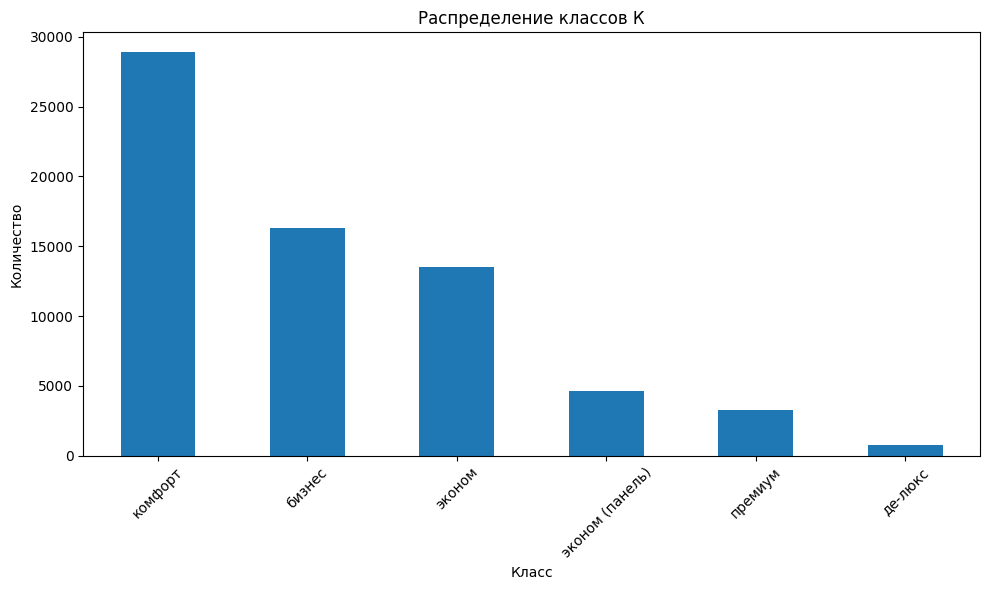

In [59]:
# 1. Подсчет частот категорий
class_counts = final_merged_df['Класс К'].value_counts()

# 2. Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Распределение классов К')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
final_merged_df.to_csv('final_merged_df.csv', index = False)


In [61]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67378 entries, 0 to 31553
Columns: 229 entries, ID to project_clean_y
dtypes: datetime64[ns](4), float64(16), int64(17), object(192)
memory usage: 118.2+ MB


In [62]:
pd.set_option('display.max_columns', None)

In [63]:
print(final_merged_df.columns)

Index(['ID', 'ID ЖК', 'ЖК рус', 'ЖК англ', 'lat', 'lng', 'Район Город',
       'Регион', 'Метро', 'Станция жд',
       ...
       'Демонстрационные квартиры (шоу-румы)', 'Комплексность строительства',
       'Большинство помещений на первых этажах с выходом на улицу нежилые',
       'Редевелопмент территории (масштабный снос существующих объектов)',
       'Сохранение объектов культурного наследия на территории ЖК',
       'Статус большинства жилых единиц',
       'Средняя этажность в жилом комплексе, этажей',
       'Доля озеленения в территории общего пользования', 'project_clean_x',
       'project_clean_y'],
      dtype='object', length=229)


In [64]:
#Проверка переменных
print(list(final_merged_df.columns))

['ID', 'ID ЖК', 'ЖК рус', 'ЖК англ', 'lat', 'lng', 'Район Город', 'Регион', 'Метро', 'Станция жд', 'Застройщик ЖК', 'Этажность К мин', 'Этажность К макс', 'Площадь К', 'Квартир в К', '1к кв', '2к кв', '3к кв', '4к кв', 'Тип помещений', 'Стены в К', 'Сдача К', 'Стадия К', 'Старт продаж К', 'Договор К', 'Класс К', 'до МКАД', 'внутри', 'Отделка', 'Зона', 'Метро транспортом', 'Метро пешком', 'Высота потолков', '% расп. корпусов', 'мес. до сдачи', 'срок экспозиции, мес', 'среднемес рост цен', 'ID дом.рф', 'Ключи (д)', 'Дата РВЭ (д)', 'пассажирских лифтов (д)', 'грузовых лифтов (д)', 'квартир на площадке (д)', 'подъездов (д)', 'корпусов в объекте', 'Общая площадь (д)', 'Планируемая стоимость строительства (д)', 'Банк эскроу (д)', 'Банк кредитор (д)', 'project_x', 'year', 'months', 'developer', 'region', 'okrug', 'corpus', 'price', 'sales_live', 'min дата РНС', 'max дата РНВ', 'average_price_growth', 'project_y', 'Уровень транспортной доступности', 'Перспективы изменения уровня транспортной д

In [65]:
# Создаем копию датафрейма
df_numeric = final_merged_df.copy()

# Преобразуем datetime колонки в timestamp
datetime_columns = df_numeric.select_dtypes(include=['datetime64[ns]']).columns
for col in datetime_columns:
    df_numeric[col] = df_numeric[col].astype(np.int64) // 10**9

# Создаем dummy-переменные для категориальных колонок
categorical_columns = df_numeric.select_dtypes(include=['object']).columns
df_numeric = pd.get_dummies(df_numeric, columns=categorical_columns, dummy_na=True)

# Проверяем результат
print(df_numeric.dtypes.value_counts())

bool       4058
int64        21
float64      16
Name: count, dtype: int64


In [66]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67378 entries, 0 to 31553
Columns: 4095 entries, ID to project_clean_y_nan
dtypes: bool(4058), float64(16), int64(21)
memory usage: 280.3 MB


In [67]:
df_numeric.to_csv('df_numeric.csv', index=False)

## 5. Эксперименты с моделями

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer


In [69]:
# Функция для обработки данных
def preprocess_data(X):
    # Заменяем бесконечности на NaN
    X_processed = X.replace([np.inf, -np.inf], np.nan)

    # Находим числовые колонки
    numeric_columns = X_processed.select_dtypes(include=['float64', 'int64']).columns

    # Для каждой числовой колонки заменяем выбросы
    for column in numeric_columns:
        # Вычисляем квантили
        Q1 = X_processed[column].quantile(0.25)
        Q3 = X_processed[column].quantile(0.75)
        IQR = Q3 - Q1

        # Определяем границы выбросов
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Заменяем выбросы на границы
        X_processed[column] = X_processed[column].clip(lower_bound, upper_bound)

    return X_processed

In [70]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'\n{model_name} metrics:')
    print(f'MAE: {mae:,.0f}')
    print(f'RMSE: {rmse:,.0f}')
    return mae, rmse

# Подготовка данных
X = df_numeric.drop(columns=['price','sales_live'])
y = df_numeric['price']

# Предобработка данных
X = preprocess_data(X)

# Разделение данных с сохранением временной последовательности
train_size = int(len(X) * 0.8)  # 80% данных для обучения
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Создаем импутер для заполнения пропущенных значений
imputer = SimpleImputer(strategy='median')

# Применяем импутер
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Восстанавливаем DataFrame структуру после импутации
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [71]:
# 1. Линейная регрессия
try:
    linear_model = LinearRegression()
    linear_model.fit(X_train_imputed, y_train)
    y_pred_linear = linear_model.predict(X_test_imputed)
    mae_linear, rmse_linear = evaluate_model(y_test, y_pred_linear, 'Linear Regression')
except Exception as e:
    print(f"Error in Linear Regression: {e}")
    mae_linear, rmse_linear = np.nan, np.nan


Linear Regression metrics:
MAE: 85,588
RMSE: 146,721


In [72]:
# 2. Random Forest
try:
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf_model.fit(X_train_imputed, y_train)
    y_pred_rf = rf_model.predict(X_test_imputed)
    mae_rf, rmse_rf = evaluate_model(y_test, y_pred_rf, 'Random Forest')
except Exception as e:
    print(f"Error in Random Forest: {e}")
    mae_rf, rmse_rf = np.nan, np.nan


Random Forest metrics:
MAE: 24,676
RMSE: 59,057


In [73]:
# 3. XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100,
                            random_state=42,
                            n_jobs=-1,
                            eval_metric='rmse')
xgb_model.fit(X_train_imputed, y_train)
y_pred_xgb = xgb_model.predict(X_test_imputed)
mae_xgb, rmse_xgb = evaluate_model(y_test, y_pred_xgb, 'XGBoost')


XGBoost metrics:
MAE: 75,234
RMSE: 127,149


In [74]:
# Сравнительная таблица результатов
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [mae_linear, mae_rf, mae_xgb],
    'RMSE': [rmse_linear, rmse_rf, rmse_xgb]
})

print('\nComparison of all models:')
print(results_df.to_string(index=False))

# Визуализация результатов
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))


Comparison of all models:
            Model       MAE       RMSE
Linear Regression 85588.356 146720.961
    Random Forest 24676.416  59057.337
          XGBoost 75234.106 127149.265


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

([0, 1, 2],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'XGBoost')])

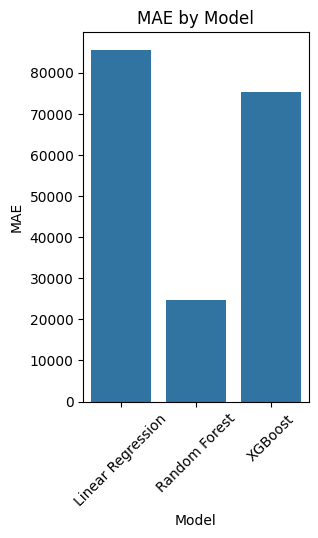

In [75]:
# График для MAE
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MAE', data=results_df)
plt.title('MAE by Model')
plt.xticks(rotation=45)

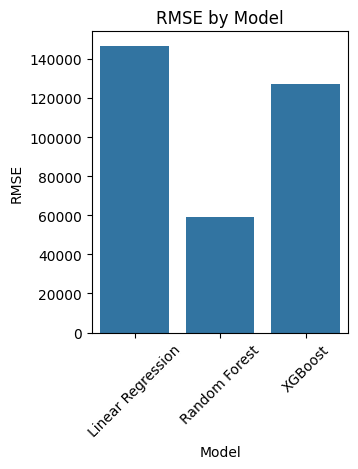

In [76]:
# График для RMSE
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title('RMSE by Model')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

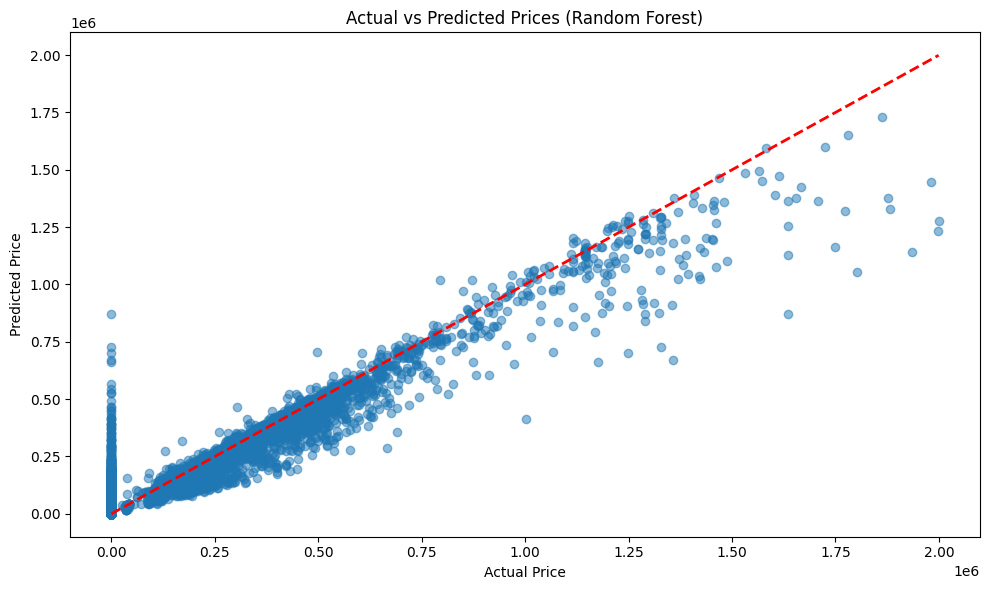

In [77]:
 #Создаем словарь с предсказаниями
predictions_dict = {
    'Linear Regression': y_pred_linear,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}

# Находим лучшую модель
best_model_name = results_df.loc[results_df['RMSE'].idxmin(), 'Model']
best_predictions = predictions_dict[best_model_name]

# Создаем scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Actual vs Predicted Prices ({best_model_name})')
plt.tight_layout()
plt.show()

In [78]:
# Анализ важности признаков для Random Forest
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 most important features:")
print(feature_importance.head(10))


Top 10 most important features:
                        feature  importance
31                       months       0.134
15                       внутри       0.111
30                         year       0.099
941   Тип помещений_Апартаменты       0.059
1                         ID ЖК       0.029
0                            ID       0.025
964             Класс К_премиум       0.023
602       Район Город_Хамовники       0.022
2933     Двор без машин_да\n1,6       0.021
34         average_price_growth       0.019


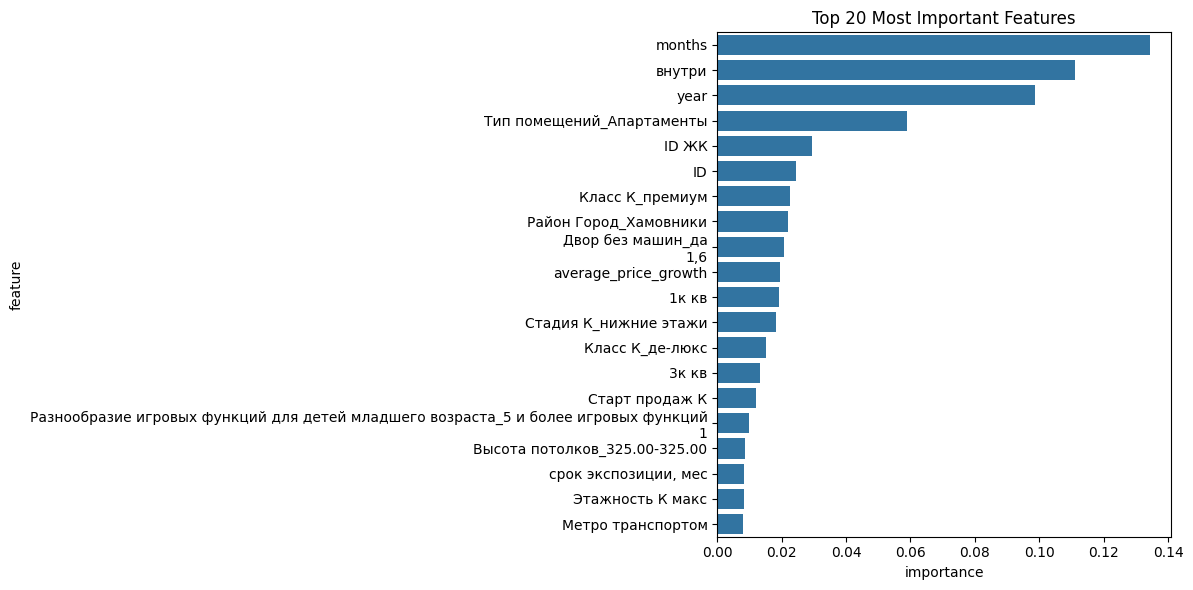

In [79]:
# Визуализация важности признаков
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Most Important Features')
plt.tight_layout()
plt.show()